## Telecom Churn Case Study

#### Problem Statement:

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

### Business Goal 

Analyse customer-level data of the leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

- Find the high value customers, retaining those high profitable customers is the number one business goal.
- To reduce customer churn, company need to predict which customers are at high risk of churn.

### Importing the required packages and libraries

In [139]:
import pandas as pd
import numpy as np
import scipy
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import os
from math import log
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.model_selection import KFold, RepeatedStratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA, IncrementalPCA 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, accuracy_score, precision_score, recall_score, f1_score 
from sklearn.metrics import roc_curve, plot_confusion_matrix, average_precision_score, precision_recall_curve, plot_roc_curve, precision_recall_fscore_support
import statsmodels.api as sm
from yellowbrick.features import Rank1D, Rank2D, RadViz, FeatureImportances
import warnings
warnings.simplefilter('ignore')

pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',200)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import Markdown, display
def printmd(string,color=None):
    colors = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colors))

In [140]:
path = os.getcwd()
path = path.replace(os.sep,'/')
data_path  = path + '/'
data_path

'C:/Users/ad/Downloads/Notebooks/Upgrad_Assignments/Telecom churn/'

**Importing the data**

In [141]:
telecom_data_raw = pd.read_csv('telecom_churn_data.csv',encoding = 'unicode-escape')

In [142]:
telecom_data_raw.head()
telecom_data_raw.tail()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109            0.00            0.00            0.00   
1     7001865778        109            0.00            0.00            0.00   
2     7001625959        109            0.00            0.00            0.00   
3     7001204172        109            0.00            0.00            0.00   
4     7000142493        109            0.00            0.00            0.00   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9  arpu_6  arpu_7  arpu_8  arpu_9  onnet_mou_6  \
0            9/30/2014  197.38  214.82  213.80   21.10          nan   
1            9/30/2014   34.05  355.07  268.32   86.28        24.11   
2            9/30/2014  167.69  189.06  210.23  290.71        11.54   
3            9/30/2014  221.34  251.10  508.05  389.50        99.91   
4            9/30/2014  261.64  309.88  238.17  163.43        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          nan         0.00          nan           nan           nan   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           nan            nan            nan           0.00   
1        304.76         53.76           0.00           0.00           0.00   
2        208.36        118.91           0.00           0.00           0.00   
3         71.68        113.54           0.00          54.86          44.38   
4        124.26         45.81           0.00           0.00           0.00   

   roam_ic_mou_9  ...  monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9  \
0            nan  ...             0             0             0             0   
1           0.00  ...             0             1             0             0   
2          38.49  ...             0             0             0             0   
3           0.00  ...             0             0             0             0   
4           0.00  ...             0             0             0             0   

   sachet_2g_6  sachet_2g_7  sachet_2g_8  sachet_2g_9  monthly_3g_6  \
0            0            0            0            0             1   
1            0            0            2            0             0   
2            0            0            0            1             0   
3            0            0            0            0             0   
4            1            0            0            0             0   

   monthly_3g_7  monthly_3g_8  monthly_3g_9  sachet_3g_6  sachet_3g_7  \
0             1             1             0            0            0   
1             0             0             0            0            0   
2             0             0             0            0            0   
3             0             0             0            0            0   
4             0             0             0            0            0   

   sachet_3g_8  sachet_3g_9  fb_user_6  fb_user_7  fb_user_8  fb_user_9   aon  \
0            0            0       1.00       1.00       1.00        nan   968   
1            0            0        nan       1.00       1.00        nan  1006   
2            0            0        nan        nan        nan       1.00  1103   
3            0            0        nan        nan        nan        nan  2491   
4            0            0     

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
99994     7001548952        109            0.00            0.00   
99995     7000607688        109            0.00            0.00   
99996     7000087541        109            0.00            0.00   
99997     7000498689        109            0.00            0.00   
99998     7001905007        109            0.00            0.00   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
99994            0.00            6/30/2014            7/31/2014   
99995            0.00            6/30/2014            7/31/2014   
99996            0.00            6/30/2014            7/31/2014   
99997            0.00            6/30/2014            7/31/2014   
99998            0.00            6/30/2014            7/31/2014   

      last_date_of_month_8 last_date_of_month_9  arpu_6  arpu_7  arpu_8  \
99994            8/31/2014            9/30/2014   18.47   69.16   57.53   
99995            8/31/2014            9/30/2014  112.20   77.81   79.08   
99996            8/31/2014            9/30/2014  229.19    0.00    0.00   
99997            8/31/2014            9/30/2014  322.99  303.39  606.82   
99998            8/31/2014            9/30/2014  687.07    0.00    0.00   

       arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
99994   29.95         5.40         3.36         5.91         0.00   
99995  140.84        29.26        18.13        16.06        49.49   
99996    0.00         1.11          nan          nan          nan   
99997  731.01         0.00         0.00         0.00         0.00   
99998    0.00        84.34          nan          nan          nan   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
99994         15.19         54.46         52.79         27.14           0.00   
99995        100.83         69.01         66.39         56.13           0.00   
99996         21.04           nan           nan           nan           0.00   
99997          0.00          0.00          0.00          0.00           0.00   
99998        166.46           nan           nan           nan           0.00   

       roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  ...  monthly_2g_6  \
99994           0.00           0.00           0.00  ...             0   
99995           0.00           0.00           0.95  ...             0   
99996            nan            nan            nan  ...             0   
99997           0.00           0.00           0.00  ...             0   
99998            nan            nan            nan  ...             1   

       monthly_2g_7  monthly_2g_8  monthly_2g_9  sachet_2g_6  sachet_2g_7  \
99994             0             0             0            0            0   
99995             0             0             0            0            0   
99996             0             0             0            2            0   
99997             0             0             0            1            0   
99998             0             0             0            0            0   

       sachet_2g_8  sachet_2g_9  monthly_3g_6  monthly_3g_7  monthly_3g_8  \
99994            0            0             0             0             0   
99995            0            0             0             0             0   
99996            0            0             0             0             0   
99997            0            0             1             2             4   
99998            0            0             0             0             0   

       monthly_3g_9  sachet_3g_6  sachet_3g_7  sachet_3g_8  sachet_3g_9  \
99994             0            0            0            0            0   
99995             0            0            0            0            0   
99996             0            0            0            0            0   
99997             4            1            0            0            0   
99998             0            0            0            0            0   

       fb_user_6  fb_user_7  fb_user_8

In [143]:
telecom_data_raw.shape

(99999, 226)

**`Making the column names to lower to avoid case problems`**

In [144]:
telecom_data_raw.columns = telecom_data_raw.columns.str.lower()
telecom_data_raw.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

**`Checking the datatypes and data quality`**

In [145]:
telecom_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


### Data Cleaning

In [146]:
def missing_ratio(df):
    print("Missing value percentage in data are :\n")
    for var in df.columns:
        print(var,": {} %".format(round(df[var].isna().sum()/len(df)*100,2)))

In [147]:
missing_ratio(telecom_data_raw)

Missing value percentage in data are :

mobile_number : 0.0 %
circle_id : 0.0 %
loc_og_t2o_mou : 1.02 %
std_og_t2o_mou : 1.02 %
loc_ic_t2o_mou : 1.02 %
last_date_of_month_6 : 0.0 %
last_date_of_month_7 : 0.6 %
last_date_of_month_8 : 1.1 %
last_date_of_month_9 : 1.66 %
arpu_6 : 0.0 %
arpu_7 : 0.0 %
arpu_8 : 0.0 %
arpu_9 : 0.0 %
onnet_mou_6 : 3.94 %
onnet_mou_7 : 3.86 %
onnet_mou_8 : 5.38 %
onnet_mou_9 : 7.75 %
offnet_mou_6 : 3.94 %
offnet_mou_7 : 3.86 %
offnet_mou_8 : 5.38 %
offnet_mou_9 : 7.75 %
roam_ic_mou_6 : 3.94 %
roam_ic_mou_7 : 3.86 %
roam_ic_mou_8 : 5.38 %
roam_ic_mou_9 : 7.75 %
roam_og_mou_6 : 3.94 %
roam_og_mou_7 : 3.86 %
roam_og_mou_8 : 5.38 %
roam_og_mou_9 : 7.75 %
loc_og_t2t_mou_6 : 3.94 %
loc_og_t2t_mou_7 : 3.86 %
loc_og_t2t_mou_8 : 5.38 %
loc_og_t2t_mou_9 : 7.75 %
loc_og_t2m_mou_6 : 3.94 %
loc_og_t2m_mou_7 : 3.86 %
loc_og_t2m_mou_8 : 5.38 %
loc_og_t2m_mou_9 : 7.75 %
loc_og_t2f_mou_6 : 3.94 %
loc_og_t2f_mou_7 : 3.86 %
loc_og_t2f_mou_8 : 5.38 %
loc_og_t2f_mou_9 : 7.75 %
loc

In [148]:
def unique_value(df):
    print('Unique values in data are:\n')
    for var in df:
        print("{} : {}".format(var,df[var].nunique()))

In [149]:
unique_value(telecom_data_raw)

Unique values in data are:

mobile_number : 99999
circle_id : 1
loc_og_t2o_mou : 1
std_og_t2o_mou : 1
loc_ic_t2o_mou : 1
last_date_of_month_6 : 1
last_date_of_month_7 : 1
last_date_of_month_8 : 1
last_date_of_month_9 : 1
arpu_6 : 85681
arpu_7 : 85308
arpu_8 : 83615
arpu_9 : 79937
onnet_mou_6 : 24313
onnet_mou_7 : 24336
onnet_mou_8 : 24089
onnet_mou_9 : 23565
offnet_mou_6 : 31140
offnet_mou_7 : 31023
offnet_mou_8 : 30908
offnet_mou_9 : 30077
roam_ic_mou_6 : 6512
roam_ic_mou_7 : 5230
roam_ic_mou_8 : 5315
roam_ic_mou_9 : 4827
roam_og_mou_6 : 8038
roam_og_mou_7 : 6639
roam_og_mou_8 : 6504
roam_og_mou_9 : 5882
loc_og_t2t_mou_6 : 13539
loc_og_t2t_mou_7 : 13411
loc_og_t2t_mou_8 : 13336
loc_og_t2t_mou_9 : 12949
loc_og_t2m_mou_6 : 20905
loc_og_t2m_mou_7 : 20637
loc_og_t2m_mou_8 : 20544
loc_og_t2m_mou_9 : 20141
loc_og_t2f_mou_6 : 3860
loc_og_t2f_mou_7 : 3863
loc_og_t2f_mou_8 : 3807
loc_og_t2f_mou_9 : 3758
loc_og_t2c_mou_6 : 2235
loc_og_t2c_mou_7 : 2426
loc_og_t2c_mou_8 : 2516
loc_og_t2c_mou_9 : 

`Dropping all the columns with morethan 50% missing values except "av_rech_amt_data_6", "av_rech_amt_data_7", "total_rech_data_6", "total_rech_data_7" variables, to use these to calculate total data recharge amounts and to use in filtering high value customers.`

In [150]:
def drop_na_cols(df):
    
    '''This function drops all the columns with morethan 50% missing values except "av_rech_amt_data_6", "av_rech_amt_data_7", 
    "total_rech_data_6", "total_rech_data_7" variables.'''
    
    internet_data = df[['total_rech_data_6','total_rech_data_7','av_rech_amt_data_6','av_rech_amt_data_7']]
    df.dropna(thresh=df.shape[0]*0.5, how='all', axis=1, inplace=True)
    
    new_df = pd.concat([df,internet_data],axis=1)
    print('Dropped unnecessary columns with more na values')
    return new_df

In [151]:
telecom_data = drop_na_cols(telecom_data_raw)

In [152]:
telecom_data.shape

(99999, 190)

In [153]:
telecom_data.describe(percentiles=[0.75,0.9,0.95,0.97,0.98,0.99])

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count       99999.00   99999.00        98981.00        98981.00   
mean   7001207270.39     109.00            0.00            0.00   
std        695669.39       0.00            0.00            0.00   
min    7000000074.00     109.00            0.00            0.00   
50%    7001204632.00     109.00            0.00            0.00   
75%    7001812030.50     109.00            0.00            0.00   
90%    7002173544.40     109.00            0.00            0.00   
95%    7002290808.80     109.00            0.00            0.00   
97%    7002339145.66     109.00            0.00            0.00   
98%    7002363034.44     109.00            0.00            0.00   
99%    7002387118.38     109.00            0.00            0.00   
max    7002410905.00     109.00            0.00            0.00   

       loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
count        98981.00 99999.00 99999.00 99999.00 99999.00     96062.00   
mean             0.00   282.99   278.54   279.15   261.65       132.40   
std              0.00   328.44   338.16   344.47   342.00       297.21   
min              0.00 -2258.71 -2014.05  -945.81 -1899.51         0.00   
50%              0.00   197.70   191.64   192.08   176.85        34.31   
75%              0.00   371.06   365.34   369.37   353.47       118.74   
90%              0.00   620.08   617.25   618.16   601.54       344.10   
95%              0.00   829.49   828.36   833.30   805.11       612.41   
97%              0.00   995.96   997.09  1008.08   978.87       847.79   
98%              0.00  1137.08  1149.57  1171.04  1132.49      1055.48   
99%              0.00  1410.79  1428.69  1455.54  1402.45      1431.76   
max              0.00 27731.09 35145.83 33543.62 38805.62      7376.71   

       onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
count     96140.00     94621.00     92254.00      96062.00      96140.00   
mean        133.67       133.02       130.30        197.94        197.05   
std         308.79       308.95       308.48        316.85        325.86   
min           0.00         0.00         0.00          0.00          0.00   
50%          32.33        32.36        29.84         96.31         91.73   
75%         115.59       115.86       112.13        231.86        226.82   
90%         348.04       345.03       342.89        477.33        480.43   
95%         624.84       620.69       617.23        727.88        744.23   
97%         872.89       859.54       852.19        945.99        958.34   
98%        1079.52      1075.22      1063.81       1144.54       1155.01   
99%        1478.53      1480.33      1445.77       1539.54       1549.38   
max        8157.78     10752.56     10427.46       8362.36       9667.13   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count      94621.00      92254.00       96062.00       96140.00   
mean         196.57        190.34           9.95           7.15   
std          327.17        319.40          72.83          73.45   
min            0.00          0.00           0.00           0.00   
50%           92.14         87.29           0.00           0.00   
75%          228.26        220.50           0.00           0.00   
90%          486.31        471.03          11.81           5.06   
95%          734.86        720.12          40.64          23.14   
97%          947.24        938.56          79.40          49.29   
98%         1146.03       1123.47         123.95          78.86   
99%         1530.40       1521.33         219.85         154.48   
max        14007.34      10310.76       13724.38       15371.04   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count       94621.00       92254.00       96062.00       96140.00   
mean            7.29           6.34          13.91           9.82   
std            68.40          57.14          71.44          58.46   
min             0.00           0.00

**Missing value imputation**

`Even though missing values are in less ratio in variables individually, dropping them leading to loss of almost 16% data.`

`Tried imputing missing values present in variables using KNNImputer technique, becuase of outliers present in most of the columns and we can not just impute with mean values of the whole column without treating outliers.`

`But knnimputer is computationally so expensive, decided to impute missing values with median values of respective variables which has less missing value ratio.`

In [154]:
telecom_b4_missing = telecom_data.copy()

`Function to impute all missing values at once`

In [155]:
def impute_all_missing(df):
    
    '''This function is intended to impute missing values of internet data related columns with 
       knnimputer and for other numerical columns with median value
       and for categorical columns with mode value'''
    
    internet_data = df[['total_rech_data_6','total_rech_data_7','av_rech_amt_data_6','av_rech_amt_data_7']]
    
    knn_imputer = KNNImputer()
    internet_data = pd.DataFrame(data = knn_imputer.fit_transform(internet_data),columns=internet_data.columns)
    df.drop(internet_data.columns, axis=1, inplace=True)
    for col in df:
        if (df[col].dtype!='object') and (df[col].isna().sum()>0):
            df[col] = df[col].replace(np.nan,df[col].median())
        elif (df[col].dtype=='object') and (df[col].isna().sum()>0):
            df[col] = df[col].replace(np.nan,df[col].mode()[0])

    new_df = pd.concat([df,internet_data],axis=1)
    print('Missing value imputation has been completed successfully')
    
    return new_df

In [156]:
master_data = impute_all_missing(telecom_data)

In [157]:
missing_ratio(master_data)

Missing value percentage in data are :

mobile_number : 0.0 %
circle_id : 0.0 %
loc_og_t2o_mou : 0.0 %
std_og_t2o_mou : 0.0 %
loc_ic_t2o_mou : 0.0 %
last_date_of_month_6 : 0.0 %
last_date_of_month_7 : 0.0 %
last_date_of_month_8 : 0.0 %
last_date_of_month_9 : 0.0 %
arpu_6 : 0.0 %
arpu_7 : 0.0 %
arpu_8 : 0.0 %
arpu_9 : 0.0 %
onnet_mou_6 : 0.0 %
onnet_mou_7 : 0.0 %
onnet_mou_8 : 0.0 %
onnet_mou_9 : 0.0 %
offnet_mou_6 : 0.0 %
offnet_mou_7 : 0.0 %
offnet_mou_8 : 0.0 %
offnet_mou_9 : 0.0 %
roam_ic_mou_6 : 0.0 %
roam_ic_mou_7 : 0.0 %
roam_ic_mou_8 : 0.0 %
roam_ic_mou_9 : 0.0 %
roam_og_mou_6 : 0.0 %
roam_og_mou_7 : 0.0 %
roam_og_mou_8 : 0.0 %
roam_og_mou_9 : 0.0 %
loc_og_t2t_mou_6 : 0.0 %
loc_og_t2t_mou_7 : 0.0 %
loc_og_t2t_mou_8 : 0.0 %
loc_og_t2t_mou_9 : 0.0 %
loc_og_t2m_mou_6 : 0.0 %
loc_og_t2m_mou_7 : 0.0 %
loc_og_t2m_mou_8 : 0.0 %
loc_og_t2m_mou_9 : 0.0 %
loc_og_t2f_mou_6 : 0.0 %
loc_og_t2f_mou_7 : 0.0 %
loc_og_t2f_mou_8 : 0.0 %
loc_og_t2f_mou_9 : 0.0 %
loc_og_t2c_mou_6 : 0.0 %
loc_og_t2c

In [158]:
master_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109            0.00            0.00            0.00   
1     7001865778        109            0.00            0.00            0.00   
2     7001625959        109            0.00            0.00            0.00   
3     7001204172        109            0.00            0.00            0.00   
4     7000142493        109            0.00            0.00            0.00   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9  arpu_6  arpu_7  arpu_8  arpu_9  onnet_mou_6  \
0            9/30/2014  197.38  214.82  213.80   21.10        34.31   
1            9/30/2014   34.05  355.07  268.32   86.28        24.11   
2            9/30/2014  167.69  189.06  210.23  290.71        11.54   
3            9/30/2014  221.34  251.10  508.05  389.50        99.91   
4            9/30/2014  261.64  309.88  238.17  163.43        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0        32.33         0.00        29.84         96.31         91.73   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00         87.29           0.00           0.00           0.00   
1        304.76         53.76           0.00           0.00           0.00   
2        208.36        118.91           0.00           0.00           0.00   
3         71.68        113.54           0.00          54.86          44.38   
4        124.26         45.81           0.00           0.00           0.00   

   roam_ic_mou_9  ...  monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9  \
0           0.00  ...             0             0             0             0   
1           0.00  ...             0             1             0             0   
2          38.49  ...             0             0             0             0   
3           0.00  ...             0             0             0             0   
4           0.00  ...             0             0             0             0   

   sachet_2g_6  sachet_2g_7  sachet_2g_8  sachet_2g_9  monthly_3g_6  \
0            0            0            0            0             1   
1            0            0            2            0             0   
2            0            0            0            1             0   
3            0            0            0            0             0   
4            1            0            0            0             0   

   monthly_3g_7  monthly_3g_8  monthly_3g_9  sachet_3g_6  sachet_3g_7  \
0             1             1             0            0            0   
1             0             0             0            0            0   
2             0             0             0            0            0   
3             0             0             0            0            0   
4             0             0             0            0            0   

   sachet_3g_8  sachet_3g_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
0            0            0   968       30.40        0.00      101.20   
1            0            0  1006        0.00        0.00        0.00   
2            0            0  1103        0.00        0.00        4.17   
3            0            0  2491        0.00        0.00        0.00   
4            0            0  1526        0.00        0.00        0.00   

**`Note: Due to memory issues in machine, used Google colab to impute missing values using knnimputer for 4 internet data        columns and wrote to csv. Will be using that cleaned csv hereafter.`**

In [159]:
#telecom_data.to_csv('master_telecom.csv',index=False)

In [160]:
#master_data = pd.read_csv('master_telecom.csv',encoding='unicode_escape')

In [161]:
master_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109            0.00            0.00            0.00   
1     7001865778        109            0.00            0.00            0.00   
2     7001625959        109            0.00            0.00            0.00   
3     7001204172        109            0.00            0.00            0.00   
4     7000142493        109            0.00            0.00            0.00   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9  arpu_6  arpu_7  arpu_8  arpu_9  onnet_mou_6  \
0            9/30/2014  197.38  214.82  213.80   21.10        34.31   
1            9/30/2014   34.05  355.07  268.32   86.28        24.11   
2            9/30/2014  167.69  189.06  210.23  290.71        11.54   
3            9/30/2014  221.34  251.10  508.05  389.50        99.91   
4            9/30/2014  261.64  309.88  238.17  163.43        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0        32.33         0.00        29.84         96.31         91.73   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00         87.29           0.00           0.00           0.00   
1        304.76         53.76           0.00           0.00           0.00   
2        208.36        118.91           0.00           0.00           0.00   
3         71.68        113.54           0.00          54.86          44.38   
4        124.26         45.81           0.00           0.00           0.00   

   roam_ic_mou_9  ...  monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9  \
0           0.00  ...             0             0             0             0   
1           0.00  ...             0             1             0             0   
2          38.49  ...             0             0             0             0   
3           0.00  ...             0             0             0             0   
4           0.00  ...             0             0             0             0   

   sachet_2g_6  sachet_2g_7  sachet_2g_8  sachet_2g_9  monthly_3g_6  \
0            0            0            0            0             1   
1            0            0            2            0             0   
2            0            0            0            1             0   
3            0            0            0            0             0   
4            1            0            0            0             0   

   monthly_3g_7  monthly_3g_8  monthly_3g_9  sachet_3g_6  sachet_3g_7  \
0             1             1             0            0            0   
1             0             0             0            0            0   
2             0             0             0            0            0   
3             0             0             0            0            0   
4             0             0             0            0            0   

   sachet_3g_8  sachet_3g_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
0            0            0   968       30.40        0.00      101.20   
1            0            0  1006        0.00        0.00        0.00   
2            0            0  1103        0.00        0.00        4.17   
3            0            0  2491        0.00        0.00        0.00   
4            0            0  1526        0.00        0.00        0.00   

In [162]:
missing_ratio(master_data)

Missing value percentage in data are :

mobile_number : 0.0 %
circle_id : 0.0 %
loc_og_t2o_mou : 0.0 %
std_og_t2o_mou : 0.0 %
loc_ic_t2o_mou : 0.0 %
last_date_of_month_6 : 0.0 %
last_date_of_month_7 : 0.0 %
last_date_of_month_8 : 0.0 %
last_date_of_month_9 : 0.0 %
arpu_6 : 0.0 %
arpu_7 : 0.0 %
arpu_8 : 0.0 %
arpu_9 : 0.0 %
onnet_mou_6 : 0.0 %
onnet_mou_7 : 0.0 %
onnet_mou_8 : 0.0 %
onnet_mou_9 : 0.0 %
offnet_mou_6 : 0.0 %
offnet_mou_7 : 0.0 %
offnet_mou_8 : 0.0 %
offnet_mou_9 : 0.0 %
roam_ic_mou_6 : 0.0 %
roam_ic_mou_7 : 0.0 %
roam_ic_mou_8 : 0.0 %
roam_ic_mou_9 : 0.0 %
roam_og_mou_6 : 0.0 %
roam_og_mou_7 : 0.0 %
roam_og_mou_8 : 0.0 %
roam_og_mou_9 : 0.0 %
loc_og_t2t_mou_6 : 0.0 %
loc_og_t2t_mou_7 : 0.0 %
loc_og_t2t_mou_8 : 0.0 %
loc_og_t2t_mou_9 : 0.0 %
loc_og_t2m_mou_6 : 0.0 %
loc_og_t2m_mou_7 : 0.0 %
loc_og_t2m_mou_8 : 0.0 %
loc_og_t2m_mou_9 : 0.0 %
loc_og_t2f_mou_6 : 0.0 %
loc_og_t2f_mou_7 : 0.0 %
loc_og_t2f_mou_8 : 0.0 %
loc_og_t2f_mou_9 : 0.0 %
loc_og_t2c_mou_6 : 0.0 %
loc_og_t2c

In [163]:
master = master_data.copy()

#### Deriving churn labels

In [164]:
def churn_label(df):

    '''Deriving churn labels by checking if the user used the call or data services or not'''
    
    df[['total_og_mou_9','total_ic_mou_9','vol_2g_mb_9','vol_3g_mb_9']] = df[['total_og_mou_9','total_ic_mou_9','vol_2g_mb_9','vol_3g_mb_9']].astype(int)
    df['churn'] = np.where(((df['total_og_mou_9']==0) & (df['total_ic_mou_9']==0) & (df['vol_2g_mb_9']==0) & (df['vol_3g_mb_9']==0)),1,0)

    print('Churn column derived')
    
    return df

In [165]:
churn_label(master_data)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109            0.00            0.00   
1         7001865778        109            0.00            0.00   
2         7001625959        109            0.00            0.00   
3         7001204172        109            0.00            0.00   
4         7000142493        109            0.00            0.00   
...              ...        ...             ...             ...   
99994     7001548952        109            0.00            0.00   
99995     7000607688        109            0.00            0.00   
99996     7000087541        109            0.00            0.00   
99997     7000498689        109            0.00            0.00   
99998     7001905007        109            0.00            0.00   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
0                0.00            6/30/2014            7/31/2014   
1                0.00            6/30/2014            7/31/2014   
2                0.00            6/30/2014            7/31/2014   
3                0.00            6/30/2014            7/31/2014   
4                0.00            6/30/2014            7/31/2014   
...               ...                  ...                  ...   
99994            0.00            6/30/2014            7/31/2014   
99995            0.00            6/30/2014            7/31/2014   
99996            0.00            6/30/2014            7/31/2014   
99997            0.00            6/30/2014            7/31/2014   
99998            0.00            6/30/2014            7/31/2014   

      last_date_of_month_8 last_date_of_month_9  arpu_6  arpu_7  arpu_8  \
0                8/31/2014            9/30/2014  197.38  214.82  213.80   
1                8/31/2014            9/30/2014   34.05  355.07  268.32   
2                8/31/2014            9/30/2014  167.69  189.06  210.23   
3                8/31/2014            9/30/2014  221.34  251.10  508.05   
4                8/31/2014            9/30/2014  261.64  309.88  238.17   
...                    ...                  ...     ...     ...     ...   
99994            8/31/2014            9/30/2014   18.47   69.16   57.53   
99995            8/31/2014            9/30/2014  112.20   77.81   79.08   
99996            8/31/2014            9/30/2014  229.19    0.00    0.00   
99997            8/31/2014            9/30/2014  322.99  303.39  606.82   
99998            8/31/2014            9/30/2014  687.07    0.00    0.00   

       arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
0       21.10        34.31        32.33         0.00        29.84   
1       86.28        24.11        78.68         7.68        18.34   
2      290.71        11.54        55.24        37.26        74.81   
3      389.50        99.91        54.39       310.98       241.71   
4      163.43        50.31       149.44        83.89        58.78   
...       ...          ...          ...          ...          ...   
99994   29.95         5.40         3.36         5.91         0.00   
99995  140.84        29.26        18.13        16.06        49.49   
99996    0.00         1.11        32.33        32.36        29.84   
99997  731.01         0.00         0.00         0.00         0.00   
99998    0.00        84.34        32.33        32.36        29.84   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
0             96.31         91.73          0.00         87.29           0.00   
1             15.74         99.84        304.76         53.76           0.00   
2            143.33        220.59        208.36        118.91           0.00   
3            123.31        109.01         71.68        113.54           0.00   
4             76.96         91.88        124.26         45.81           0.00   
...             ...           ...           ...           ...            ...   
99994         15.19         54.46         52.79         27.14           0.00   
99995        100.83        

In [166]:
master_data['churn'].value_counts()

print("Churn rate in Total customers data  {} %".format(round(master_data['churn'].value_counts()[1]/len(master_data)*100,2)))

0    89387
1    10612
Name: churn, dtype: int64

Churn rate in Total customers data  10.61 %


**`Dropping columns with single unique value, as they are not useful in modeling or analysis.`**

In [167]:
def drop_non_unique_cols(df):
    
    '''dropping columns with only 1 unique value and also date columns'''
    
    for col in df:
        if len(df[col].unique())==1:
            df.drop(col,axis=1,inplace=True)
        
    new_df = df.select_dtypes(exclude='object')
    print('Dropped non unique columns')
    
    return new_df    

In [168]:
master_telecom = master_data.copy()

In [169]:
master_data = drop_non_unique_cols(master_data)

In [170]:
master_data.select_dtypes(include='object').head(2)

Empty DataFrame
Columns: []
Index: [0, 1]

#### Deriving high_value_customers data

In [171]:
def high_value_customers(df):
    
    '''Deriving data of high value customers based on the pareto rule analysis'''
    
    # Deriving total recharge amount spent on data packs by multiplying number of data
    # recharges with average data recharge amount`**'''

    df['total_amnt_data_6'] = df['total_rech_data_6']*df['av_rech_amt_data_6']
    df['total_amnt_data_7'] = df['total_rech_data_7']*df['av_rech_amt_data_7']

    # Deriving total recharge amount spent for call and data by each user by adding data and call recharge amounts.

    df['total_recharge_amount_6'] = df['total_amnt_data_6']+df['total_rech_amt_6']

    df['total_recharge_amount_7'] = df['total_amnt_data_7']+df['total_rech_amt_7']

    # Derivinhg average amount spent by users for months 6 and 7 by taking average
    # of both total amount of 6th and 7th months.

    df['avg_amnt_6_7'] = (df['total_recharge_amount_6']+df['total_recharge_amount_7'])/2
    
    # Filtering top 30% customers as High valued customers based on the total amount spent by customers. 

    high_value_customers = df.loc[df['avg_amnt_6_7']>=(df['avg_amnt_6_7'].quantile(0.7))]
    high_value_customers.reset_index(drop=True,inplace=True)
    
    # dropping churn phase variables i.e data from 9th month
    high_value_cols = [col for col in df.columns if col[-1]!='9']
    high_value_customers = high_value_customers[high_value_cols]
    
    return df,high_value_customers

In [172]:
master_data, high_value = high_value_customers(master_data)

In [173]:
print('master_data data shape', master_data.shape)
print('high_value data shape', high_value.shape)

master_data data shape (99999, 176)
high_value data shape (30013, 136)


**Filtering data into Good phase, Action phase, and Churn phase for analysis**

In [174]:
def filter_data_byphase(master_df):
    
    '''filtering data into good_phase, action_phase, churn_phase dataframes for analysis.
       Note: these 3 will be having whole data and not just top 30% customers data.'''
    
    all_cols = master_df.columns.tolist()
    common_cols = [col for col in master_df.columns if col[-1].isalpha()]
    good_cols = common_cols+[col for col in master_df.columns if col[-1]=='6' or col[-1]=='7']
    action_cols = common_cols+[col for col in master_df.columns if col[-1]=='8']
    churn_cols = common_cols+[col for col in master_df.columns if col[-1]=='9']
    
    good_phase = master_df[good_cols]
    action_phase = master_df[action_cols]
    churn_phase = master_df[churn_cols]
    
    return good_phase,action_phase,churn_phase

In [175]:
good_phase, action_phase, churn_phase = filter_data_byphase(master_data)

In [176]:
print('good_phase data shape', good_phase.shape)
print('action_phase data shape', action_phase.shape)
print('churn_phase data shape', churn_phase.shape)

good_phase data shape (99999, 96)
action_phase data shape (99999, 47)
churn_phase data shape (99999, 47)


In [177]:
good_phase.head(2)
action_phase.head(2)
churn_phase.head(2)

mobile_number   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  churn  \
0     7000842753   968       30.40        0.00      101.20        3.58      1   
1     7001865778  1006        0.00        0.00        0.00        0.00      0   

   arpu_6  arpu_7  onnet_mou_6  onnet_mou_7  offnet_mou_6  offnet_mou_7  \
0  197.38  214.82        34.31        32.33         96.31         91.73   
1   34.05  355.07        24.11        78.68         15.74         99.84   

   roam_ic_mou_6  roam_ic_mou_7  roam_og_mou_6  roam_og_mou_7  \
0           0.00           0.00           0.00           0.00   
1           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             11.91             11.61             41.03             40.43   
1             23.88             74.56             11.51             75.94   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00              0.00              2.91   

   ...  max_rech_amt_6  max_rech_amt_7  last_day_rch_amt_6  \
0  ...             252             252                 252   
1  ...              44             154                  44   

   last_day_rch_amt_7  vol_2g_mb_6  vol_2g_mb_7  vol_3g_mb_6  vol_3g_mb_7  \
0                 252        30.13         1.32        83.57       150.76   
1                  23         0.00       108.07         0.00         0.00   

   monthly_2g_6  monthly_2g_7  sachet_2g_6  sachet_2g_7  monthly_3g_6  \
0             0             0            0            0             1   
1             0             1            0            0             0   

   monthly_3g_7  sachet_3g_6  sachet_3g_7  total_rech_data_6  \
0             1            0            0               1.00   
1             0            0            0               1.00   

   total_rech_data_7  av_rech_amt_data_6  av_rech_amt_data_7  \
0               1.00              252.00              252.00   
1               1.00              116.60              154.00   

   total_amnt_data_6  total_amnt_data_7  total_recharge_amount_6  \
0             252.00             252.00                   614.00   
1             116.60             154.00                   190.60   

   total_recharge_amount_7  avg_amnt_6_7  
0                   504.00        559.00  
1                   538.00        364.30  

[2 rows x 96 columns]

mobile_number   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  churn  \
0     7000842753   968       30.40        0.00      101.20        3.58      1   
1     7001865778  1006        0.00        0.00        0.00        0.00      0   

   arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
0  213.80         0.00          0.00           0.00           0.00   
1  268.32         7.68        304.76           0.00           0.00   

   loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
0              0.00              0.00              0.00              0.00   
1              7.68            291.86              0.00              0.00   

   loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
0          0.00              0.00              0.00              0.00   
1        299.54              0.00              0.13              0.00   

   std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
0          0.00          0.00          0.00         0.00            0.00   
1          0.13          0.00         12.76         0.00          312.44   

   loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
0              0.16              4.13              1.15          5.44   
1             29.23            375.58              3.61        408.43   

   std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
0              0.00              0.00              0.00          0.00   
1              2.35             12.49              0.00         14.84   

   total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
0            5.44          0.00          0.00         0.00                 2   
1          423.28          0.00          0.00         0.00                11   

   total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  vol_2g_mb_8  \
0               252             252                 252         5.75   
1               283              65                  30       365.47   

   vol_3g_mb_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  sachet_3g_8  
0       109.61             0            0             1            0  
1         0.00             0            2             0            0

mobile_number   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  churn  \
0     7000842753   968       30.40        0.00      101.20        3.58      1   
1     7001865778  1006        0.00        0.00        0.00        0.00      0   

   arpu_9  onnet_mou_9  offnet_mou_9  roam_ic_mou_9  roam_og_mou_9  \
0   21.10        29.84         87.29           0.00           0.00   
1   86.28        18.34         53.76           0.00           0.00   

   loc_og_t2t_mou_9  loc_og_t2m_mou_9  loc_og_t2f_mou_9  loc_og_t2c_mou_9  \
0             11.26             39.12              0.00              0.00   
1             18.34             53.76              0.00              0.00   

   loc_og_mou_9  std_og_t2t_mou_9  std_og_t2m_mou_9  std_og_t2f_mou_9  \
0         61.84              0.00              2.50              0.00   
1         72.11              0.00              0.00              0.00   

   std_og_mou_9  isd_og_mou_9  spl_og_mou_9  og_others_9  total_og_mou_9  \
0          8.41          0.00          0.00         0.00               0   
1          0.00          0.00          0.00         0.00              72   

   loc_ic_t2t_mou_9  loc_ic_t2m_mou_9  loc_ic_t2f_mou_9  loc_ic_mou_9  \
0             15.66             56.61              0.96         91.64   
1            116.09             56.93              0.00        173.03   

   std_ic_t2t_mou_9  std_ic_t2m_mou_9  std_ic_t2f_mou_9  std_ic_mou_9  \
0              0.00              1.74              0.00          5.38   
1              0.00             15.01              0.00         15.01   

   total_ic_mou_9  spl_ic_mou_9  isd_ic_mou_9  ic_others_9  total_rech_num_9  \
0               0          0.00          0.00         0.00                 6   
1             188          0.00          0.00         0.00                 5   

   total_rech_amt_9  max_rech_amt_9  last_day_rch_amt_9  vol_2g_mb_9  \
0                 0               0                   0            0   
1               121              50                   0            0   

   vol_3g_mb_9  monthly_2g_9  sachet_2g_9  monthly_3g_9  sachet_3g_9  
0            0             0            0             0            0  
1            0             0            0             0            0

In [178]:
high_value['churn'].value_counts()

print("Churn rate in high value customers {} %".format(round(high_value['churn'].value_counts()[1]/len(high_value)*100,2)))


0    27215
1     2798
Name: churn, dtype: int64

Churn rate in high value customers 9.32 %


In [179]:
#high_value.to_csv('high_value.csv',index=False)

### Exploratory Data Analysis

In [180]:
high_value_eda = high_value.copy()

In [181]:
high_value_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30013 entries, 0 to 30012
Columns: 136 entries, mobile_number to avg_amnt_6_7
dtypes: float64(109), int32(1), int64(26)
memory usage: 31.0 MB


In [182]:
high_value_eda.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8',
       ...
       'total_rech_data_6', 'total_rech_data_7', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'churn', 'total_amnt_data_6', 'total_amnt_data_7',
       'total_recharge_amount_6', 'total_recharge_amount_7', 'avg_amnt_6_7'],
      dtype='object', length=136)

In [183]:
high_value_eda.describe()

mobile_number   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  \
count       30013.00 30013.00 30013.00 30013.00     30013.00     30013.00   
mean   7001208462.30   558.95   559.73   506.22       276.96       284.92   
std        691398.41   457.06   477.27   499.63       454.32       475.27   
min    7000000074.00 -2258.71 -2014.05  -945.81         0.00         0.00   
25%    7000610744.00   321.01   319.25   244.86        30.51        30.49   
50%    7001208170.00   469.06   465.20   417.03       108.36       106.69   
75%    7001809010.00   694.93   693.36   651.07       324.48       330.31   
max    7002410905.00 27731.09 35145.83 33543.62      7376.71      8157.78   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count     30013.00      30013.00      30013.00      30013.00       30013.00   
mean        251.08        395.52        400.33        355.90          16.27   
std         457.39        473.93        490.53        475.47          76.49   
min           0.00          0.00          0.00          0.00           0.00   
25%          23.78        102.31        101.26         85.21           0.00   
50%          83.59        259.86        255.38        214.46           0.00   
75%         273.31        502.94        508.63        459.23           0.00   
max       10752.56       8362.36       9667.13      14007.34        2589.09   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count       30013.00       30013.00       30013.00       30013.00   
mean           12.51          12.23          27.79          20.93   
std            72.42          68.81         117.35          96.79   
min             0.00           0.00           0.00           0.00   
25%             0.00           0.00           0.00           0.00   
50%             0.00           0.00           0.00           0.00   
75%             0.00           0.00           0.00           0.00   
max          3813.29        2898.34        3775.11        2812.04   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count       30013.00          30013.00          30013.00          30013.00   
mean           20.29             83.77             85.24             77.94   
std           105.09            218.97            232.68            219.41   
min             0.00              0.00              0.00              0.00   
25%             0.00              5.98              6.54              5.18   
50%             0.00             26.03             26.69             22.51   
75%             0.00             80.48             81.21             74.49   
max          5337.04           6431.33           7400.66          10752.56   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count          30013.00          30013.00          30013.00          30013.00   
mean             169.13            168.86            156.93              6.43   
std              249.40            240.47            232.21             22.25   
min                0.00              0.00              0.00              0.00   
25%               23.14             25.59             20.78              0.00   
50%               82.58             84.81             72.68              0.00   
75%              223.69            222.31            206.89              4.15   
max             4729.74           4557.14           4961.33           1466.03   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  ...  monthly_2g_8  sachet_2g_6  \
count          30013.00          30013.00  ...      30013.00     30013.00   
mean               6.50              5.92  ...          0.09         0.86   
std               22.19             19.73  ...          0.32         2.45   
min                0.00              0.00  ...          0.00         0.00   
25%                0.00              0.00  ...          0.00         0.00   
50%                0.00              0.00  ...          0.00         0.00   
75%    

**`Drop columns that have over 75% correlation with each other.`**

In [184]:
def drop_highcorrelated_cols(col): 
    high_value_eda.drop(col,axis=1, inplace = True)
    print (col, "Dropped" )

In [185]:
cor = high_value_eda.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.75) | (cor < -0.75)].sort_values()

total_rech_num_8         total_rech_num_7          0.75
total_ic_mou_7           loc_ic_t2m_mou_7          0.75
std_og_mou_8             std_og_t2m_mou_8          0.75
total_rech_amt_8         arpu_7                    0.75
total_rech_amt_7         arpu_8                    0.76
vol_3g_mb_8              vol_3g_mb_7               0.76
std_og_t2f_mou_8         std_og_t2f_mou_7          0.76
offnet_mou_8             offnet_mou_7              0.76
loc_og_mou_7             loc_og_t2t_mou_7          0.76
total_og_mou_8           total_og_mou_7            0.76
std_og_t2m_mou_8         std_og_t2m_mou_7          0.76
arpu_8                   arpu_7                    0.76
loc_og_mou_8             loc_og_t2t_mou_8          0.76
total_ic_mou_6           loc_ic_t2m_mou_6          0.77
loc_ic_t2t_mou_8         loc_ic_t2t_mou_7          0.77
total_ic_mou_8           loc_ic_t2m_mou_8          0.77
loc_ic_t2f_mou_7         loc_ic_t2f_mou_6          0.77
loc_ic_t2t_mou_7         loc_ic_t2t_mou_6       

In [186]:
corr_list = ['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8',
'std_og_t2t_mou_7','std_og_t2t_mou_6','std_og_t2t_mou_8',
'std_og_t2m_mou_7','std_og_t2m_mou_6','std_og_t2m_mou_8',
'loc_og_t2m_mou_8','loc_og_t2m_mou_6','loc_og_t2m_mou_7',
'loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8',
'loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8',
'loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8',
'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8']

for i in corr_list: 
    drop_highcorrelated_cols(i)

total_rech_amt_6 Dropped
total_rech_amt_7 Dropped
total_rech_amt_8 Dropped
std_og_t2t_mou_7 Dropped
std_og_t2t_mou_6 Dropped
std_og_t2t_mou_8 Dropped
std_og_t2m_mou_7 Dropped
std_og_t2m_mou_6 Dropped
std_og_t2m_mou_8 Dropped
loc_og_t2m_mou_8 Dropped
loc_og_t2m_mou_6 Dropped
loc_og_t2m_mou_7 Dropped
loc_og_t2f_mou_6 Dropped
loc_og_t2f_mou_7 Dropped
loc_og_t2f_mou_8 Dropped
loc_ic_t2f_mou_6 Dropped
loc_ic_t2f_mou_7 Dropped
loc_ic_t2f_mou_8 Dropped
loc_ic_t2m_mou_6 Dropped
loc_ic_t2m_mou_7 Dropped
loc_ic_t2m_mou_8 Dropped
std_ic_t2m_mou_6 Dropped
std_ic_t2m_mou_7 Dropped
std_ic_t2m_mou_8 Dropped


In [187]:
corr_list2 = [
'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8',
'loc_ic_mou_7','loc_ic_mou_6','loc_ic_mou_8',
'std_og_mou_6','std_og_mou_7','std_og_mou_8','std_og_t2f_mou_7',
'std_og_t2f_mou_6','std_og_t2f_mou_8',
'total_amnt_data_6','total_amnt_data_7',
'sachet_2g_7','sachet_2g_8','sachet_2g_6',
'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8',
'total_recharge_amount_6','total_recharge_amount_7',
'isd_og_mou_7','isd_og_mou_6','isd_og_mou_8']
for i in corr_list2: 
    drop_highcorrelated_cols(i)

loc_og_t2t_mou_6 Dropped
loc_og_t2t_mou_7 Dropped
loc_og_t2t_mou_8 Dropped
loc_ic_mou_7 Dropped
loc_ic_mou_6 Dropped
loc_ic_mou_8 Dropped
std_og_mou_6 Dropped
std_og_mou_7 Dropped
std_og_mou_8 Dropped
std_og_t2f_mou_7 Dropped
std_og_t2f_mou_6 Dropped
std_og_t2f_mou_8 Dropped
total_amnt_data_6 Dropped
total_amnt_data_7 Dropped
sachet_2g_7 Dropped
sachet_2g_8 Dropped
sachet_2g_6 Dropped
loc_ic_t2t_mou_6 Dropped
loc_ic_t2t_mou_7 Dropped
loc_ic_t2t_mou_8 Dropped
total_recharge_amount_6 Dropped
total_recharge_amount_7 Dropped
isd_og_mou_7 Dropped
isd_og_mou_6 Dropped
isd_og_mou_8 Dropped


In [188]:
cor = high_value_eda.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.75) | (cor < -0.75)].sort_values()

total_rech_num_8  total_rech_num_7   0.75
vol_3g_mb_8       vol_3g_mb_7        0.76
offnet_mou_8      offnet_mou_7       0.76
total_og_mou_8    total_og_mou_7     0.76
arpu_8            arpu_7             0.76
total_ic_mou_7    total_ic_mou_6     0.79
onnet_mou_8       onnet_mou_7        0.80
loc_og_mou_7      loc_og_mou_6       0.80
total_ic_mou_8    total_ic_mou_7     0.81
loc_og_mou_8      loc_og_mou_7       0.84
dtype: float64

In [189]:
high_value_eda.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2f_mou_6',
       'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7',
       'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6',
       'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7',
       'ic_others_8', 'total_rech_num_6', 'total_rech_num_7',
  

### Bivariate Analysis

#### Pair plots with target column churn

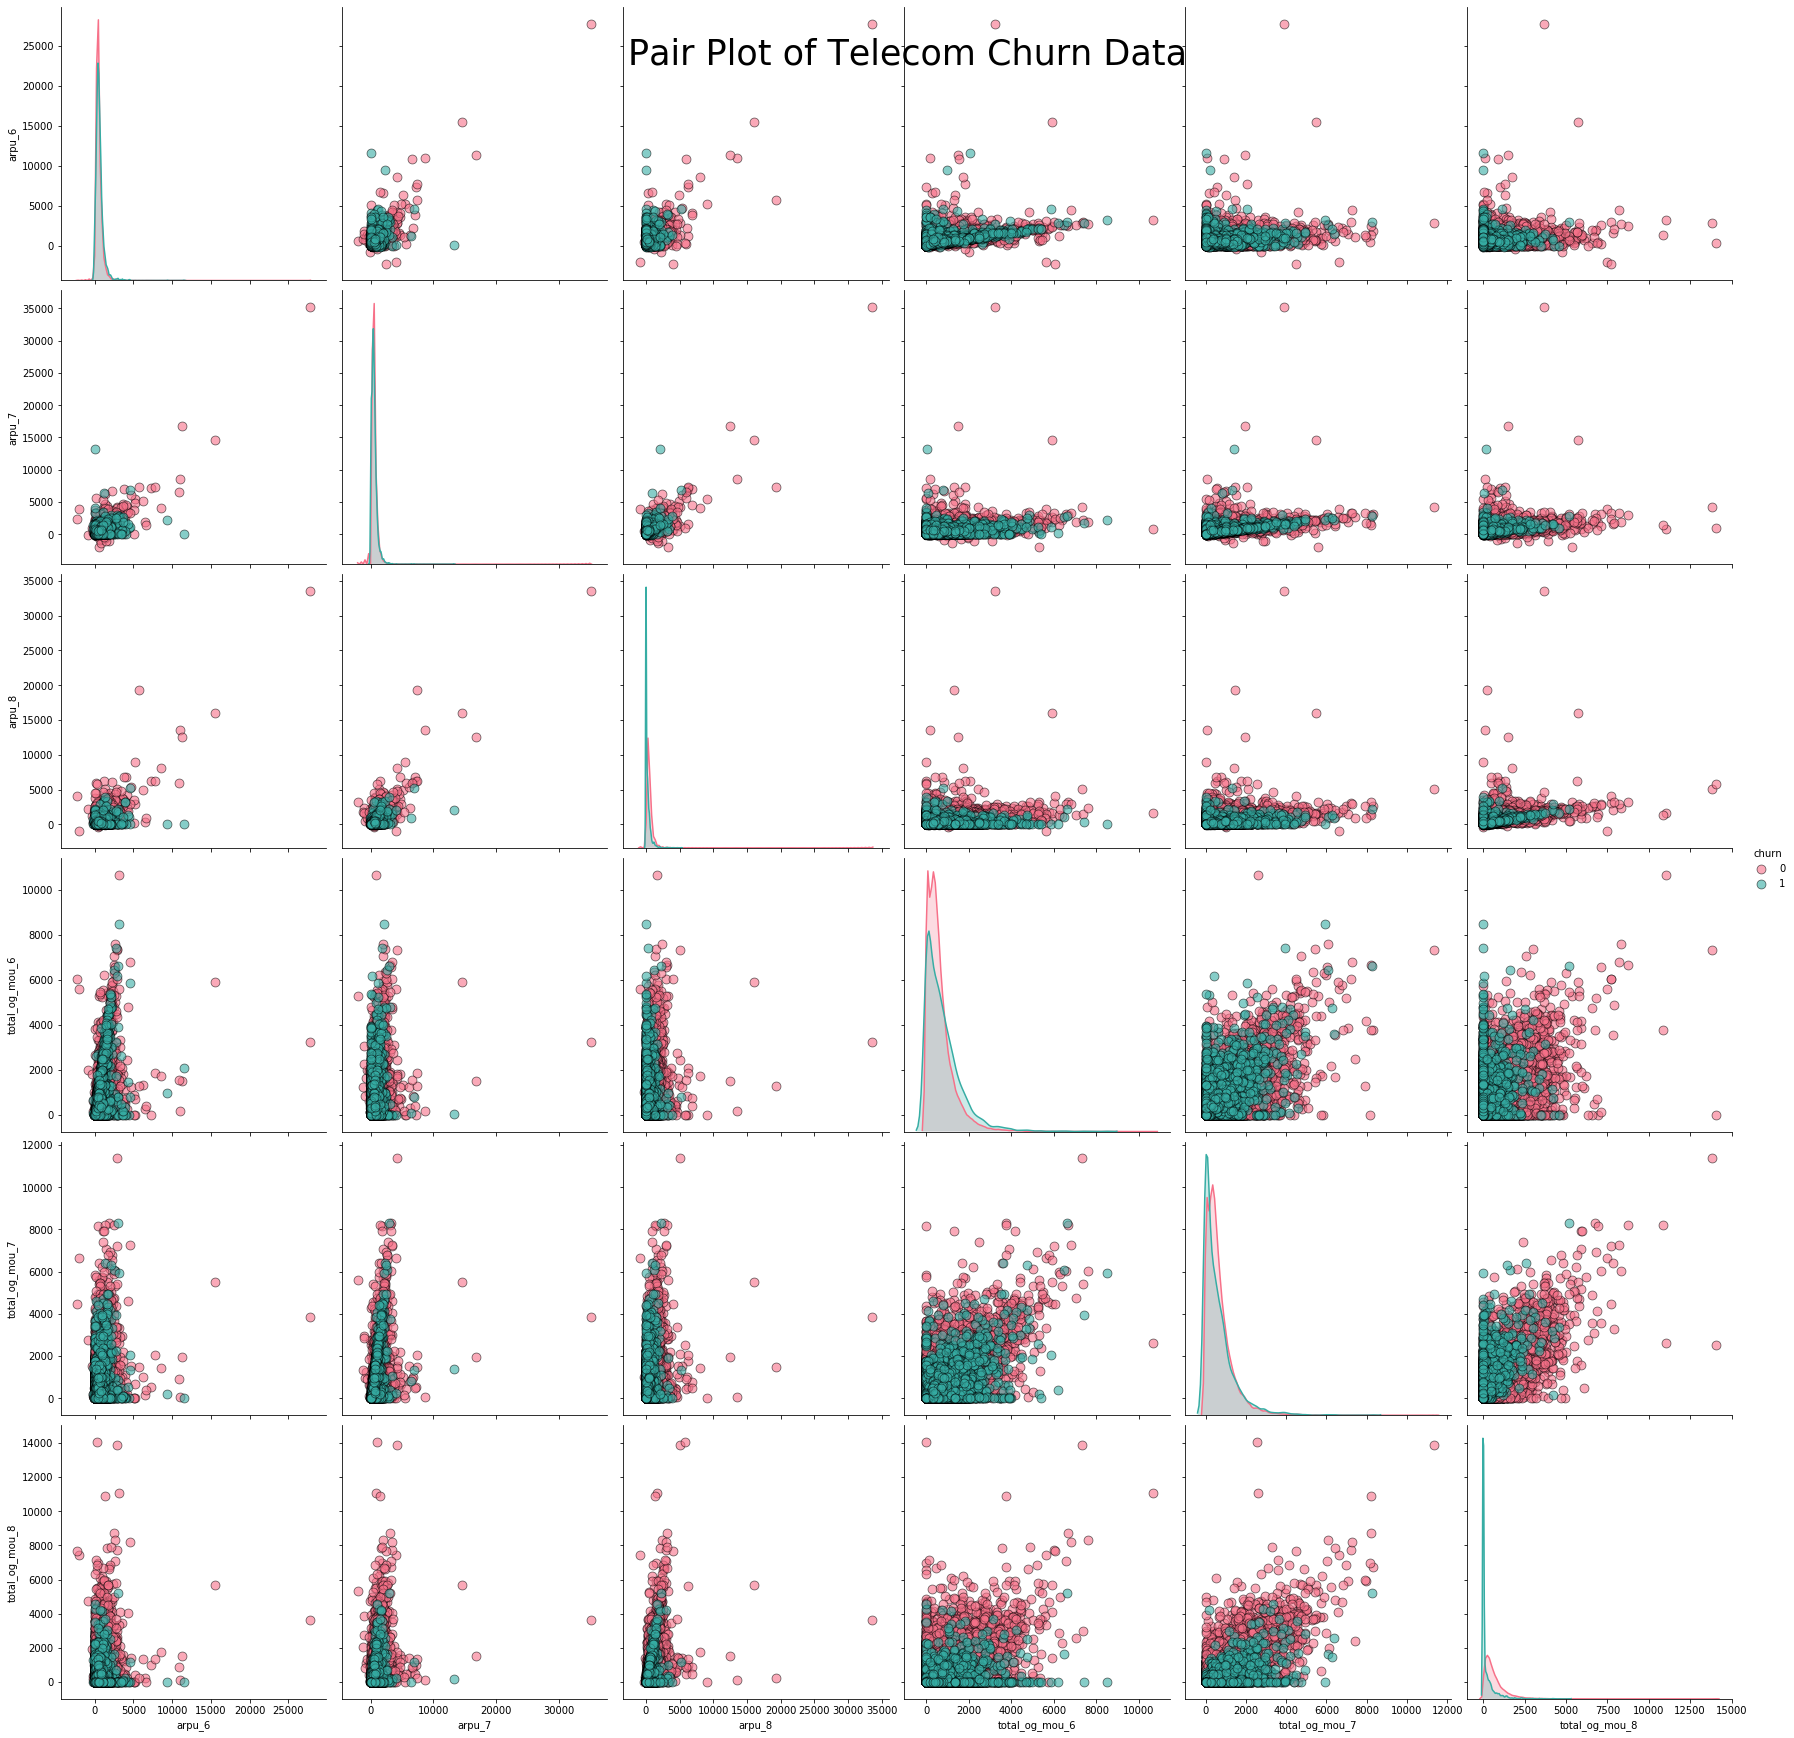

In [190]:
# Plot colored by Churn 0/1
sns.pairplot(high_value_eda, 
             vars = ['arpu_6','arpu_7','arpu_8','total_og_mou_6','total_og_mou_7','total_og_mou_8'],
             hue = 'churn', diag_kind = 'kde', palette='husl',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, size = 4);
plt.suptitle('Pair Plot of Telecom Churn Data', size = 35);

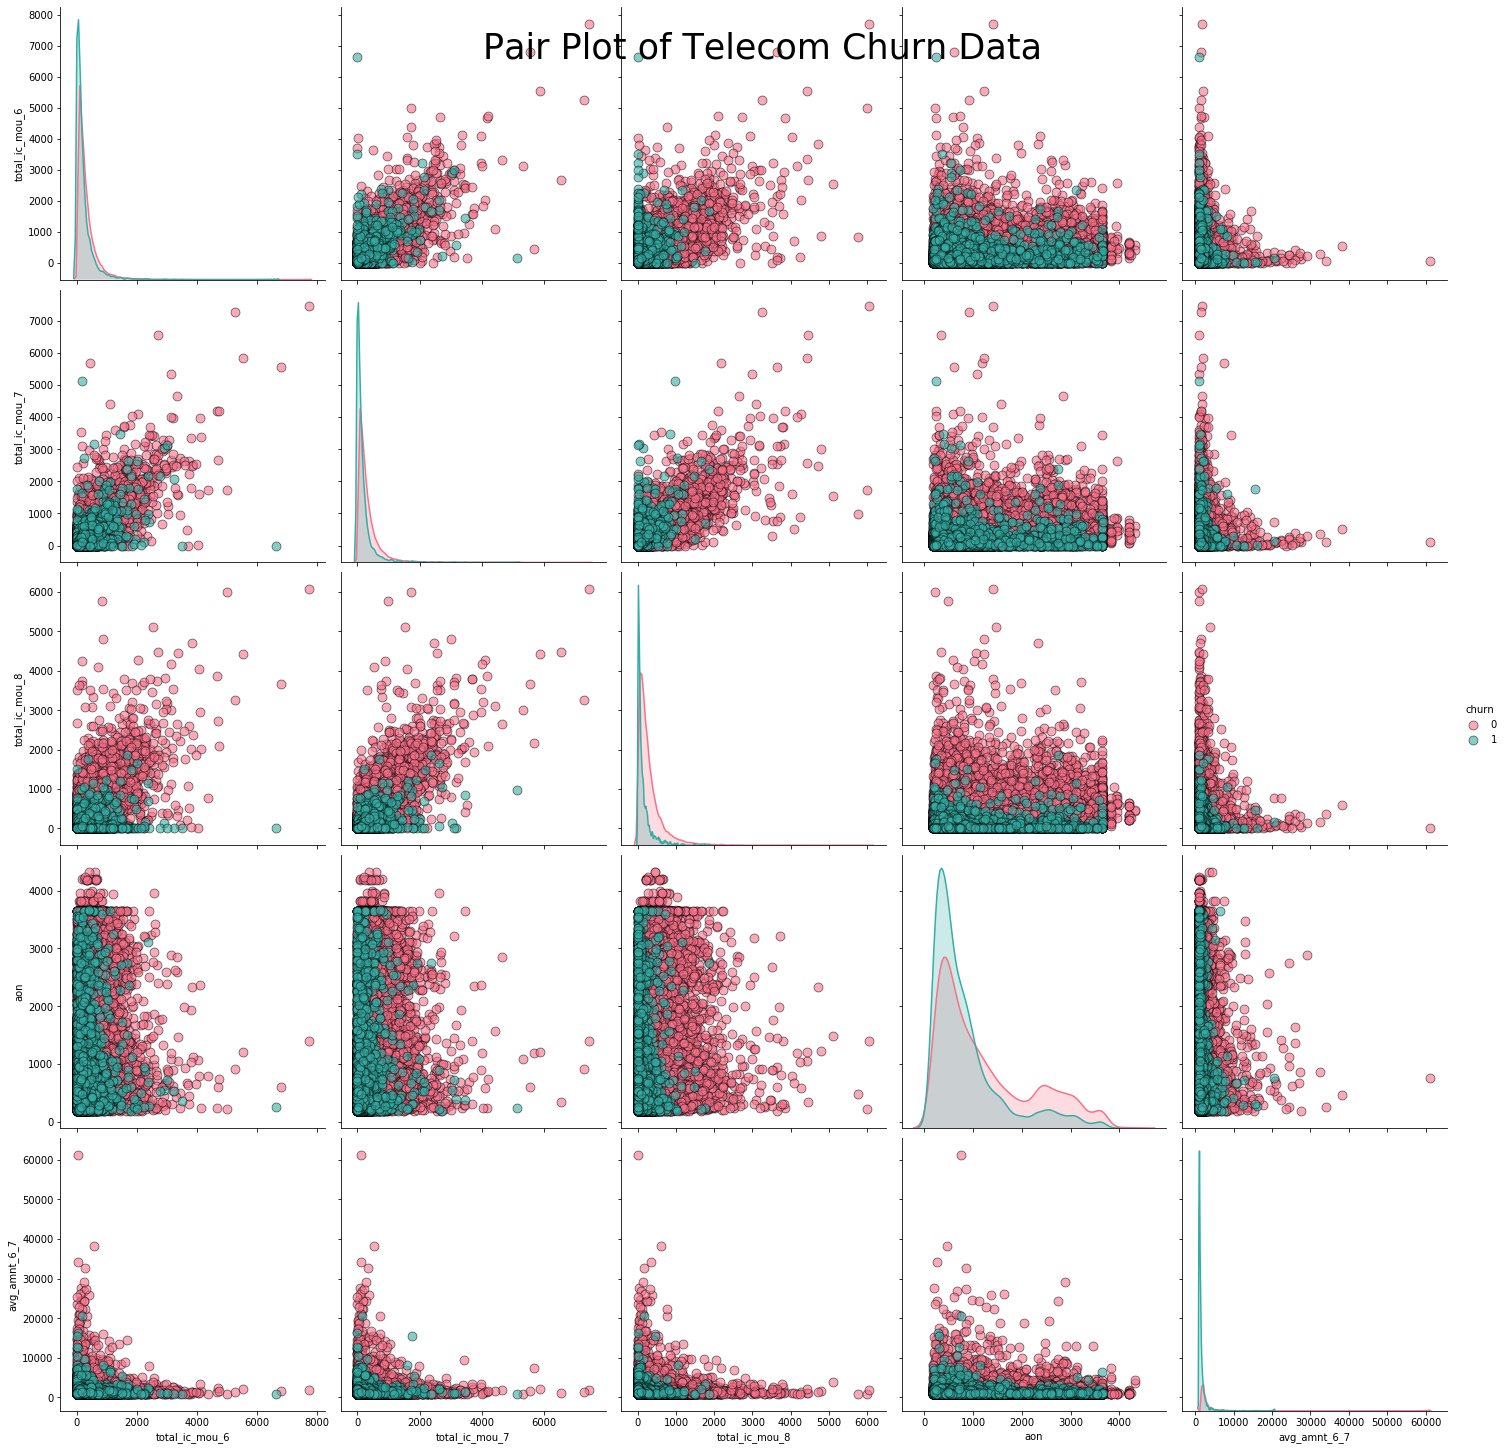

In [191]:
#Pair Plot contd..
sns.pairplot(high_value_eda, 
       vars = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                    'aon','avg_amnt_6_7'],
             hue = 'churn', diag_kind = 'kde', palette='husl',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);
plt.suptitle('Pair Plot of Telecom Churn Data',size = 25);

In [192]:
len(high_value_eda.columns)

87

In [193]:
high_value_eda.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2f_mou_6',
       'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7',
       'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6',
       'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7',
       'ic_others_8', 'total_rech_num_6', 'total_rech_num_7',
  

<Figure size 3960x1440 with 0 Axes>

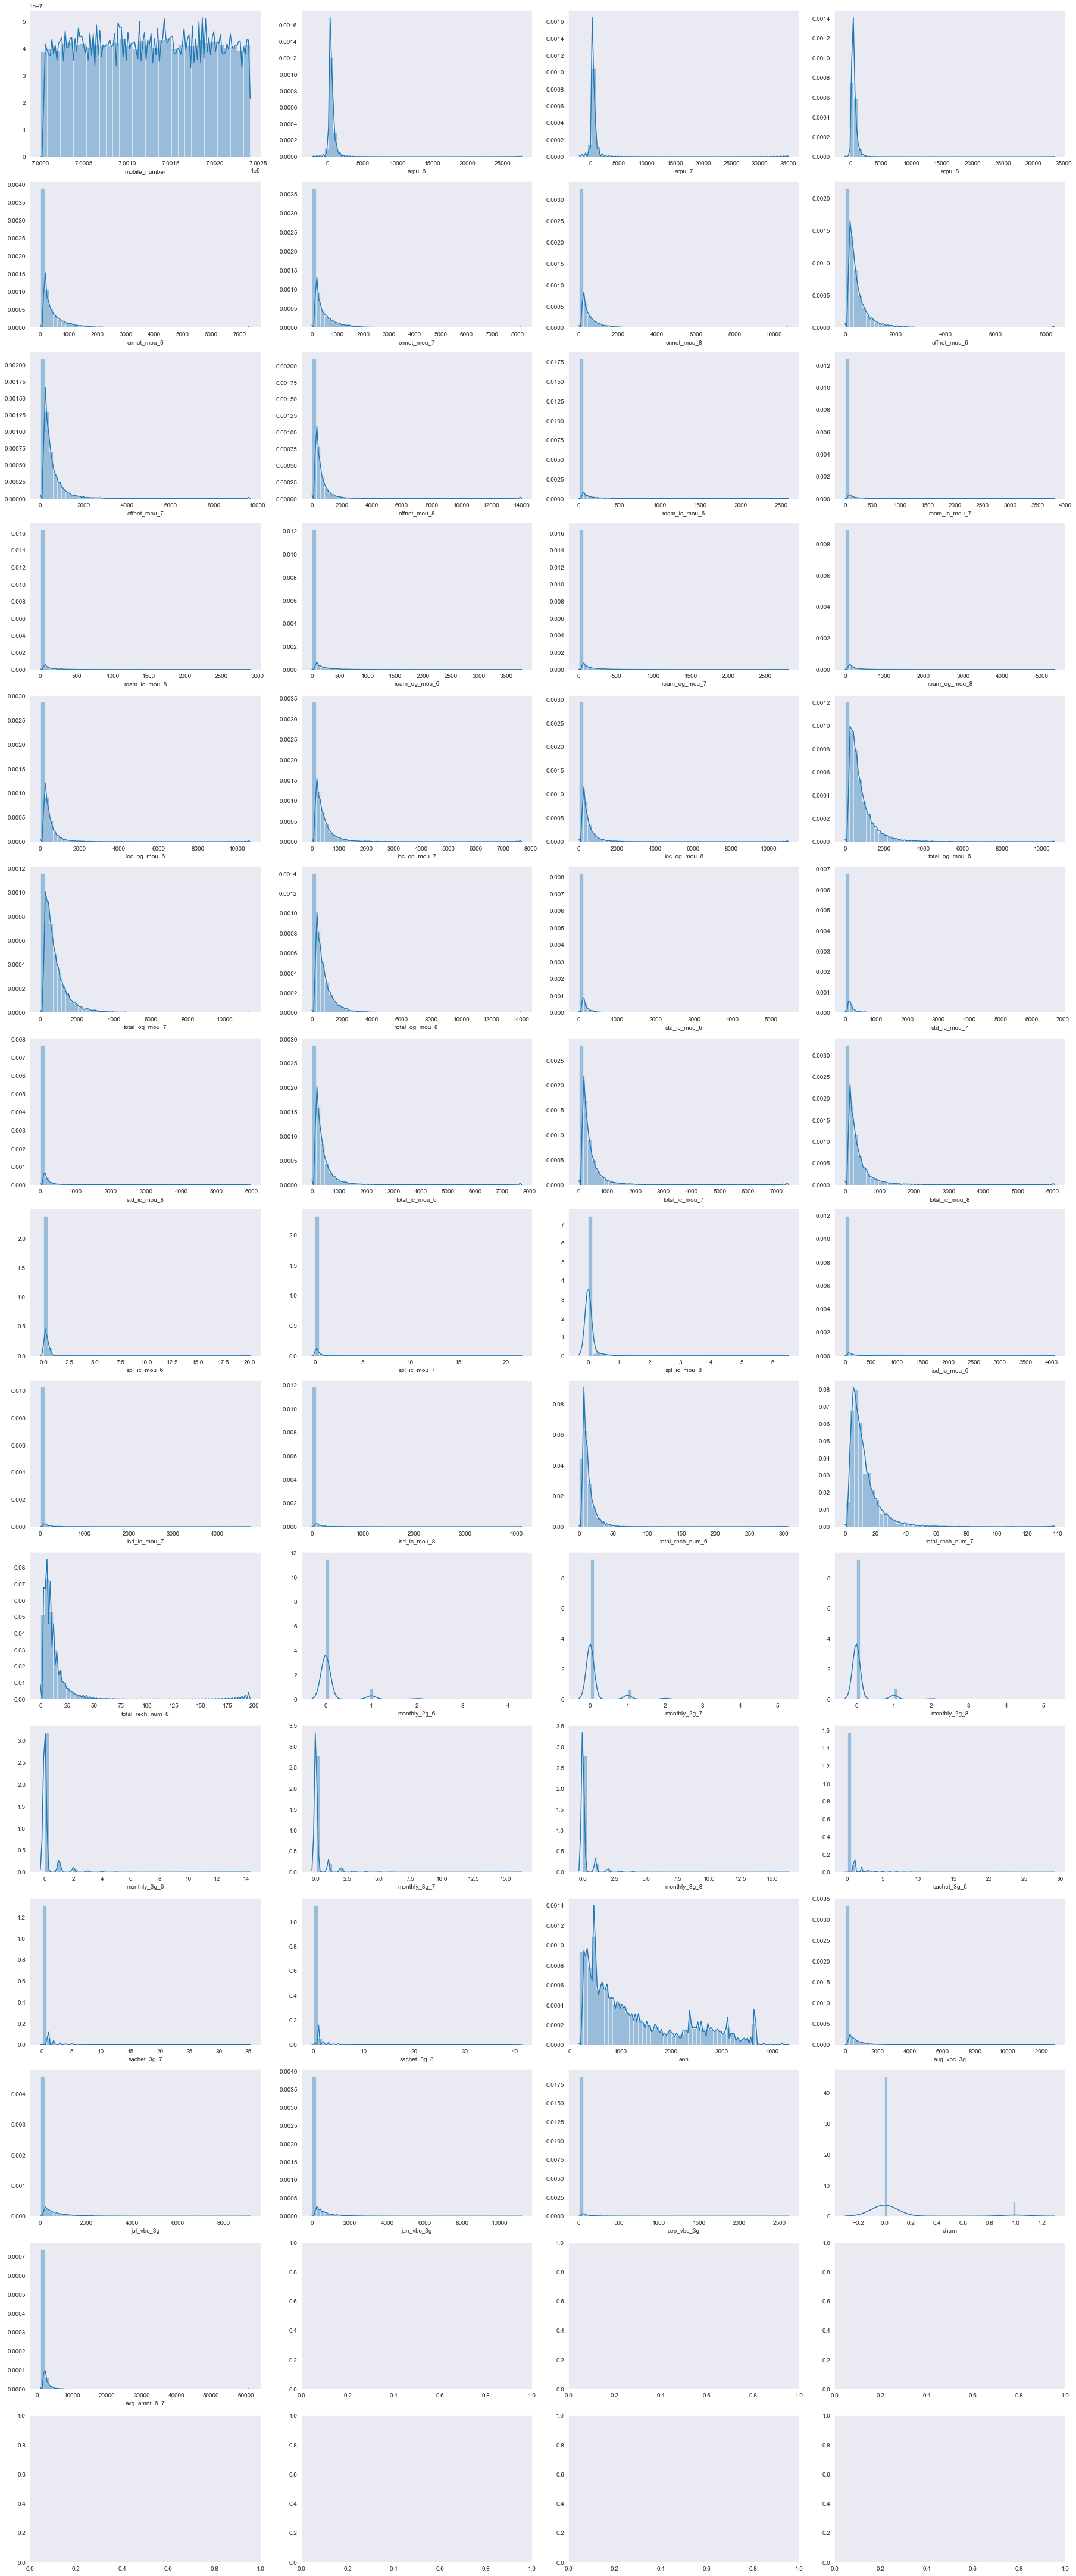

<Figure size 3960x1440 with 0 Axes>

In [234]:
# increase rows 24~25
fig , axes = plt.subplots(nrows=15, ncols=4, figsize=(25,60),constrained_layout=True)
columns=['mobile_number','arpu_6','arpu_7','arpu_8','onnet_mou_6',
       'onnet_mou_7','onnet_mou_8','offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8','roam_ic_mou_6','roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6','roam_og_mou_7','roam_og_mou_8', 
        'loc_og_mou_6','loc_og_mou_7','loc_og_mou_8',
       'total_og_mou_6','total_og_mou_7','total_og_mou_8',
        'std_ic_mou_6','std_ic_mou_7','std_ic_mou_8',
         'total_ic_mou_6','total_ic_mou_7', 'total_ic_mou_8',
       'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8',
        'isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8', 
         'total_rech_num_6', 'total_rech_num_7','total_rech_num_8','monthly_2g_6',
       'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6', 'monthly_3g_7',
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g',
        'churn', 'avg_amnt_6_7']
plt.figure(figsize = (55, 20));
for i, column in enumerate(columns):
    sns.distplot(high_value_eda[column],ax=axes[i//4,i%4],kde_kws={'bw':0.1});
    

In [208]:
columns = ['arpu_6','arpu_7','arpu_8','total_og_mou_6','total_og_mou_7','total_og_mou_8',
           'total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8',
           'vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
           'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8',
           'aon','aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','avg_amnt_6_7']

**`Boxplot analysis`**

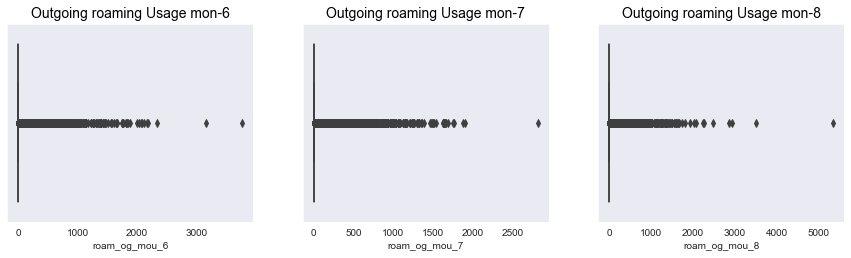

In [211]:
plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.boxplot(high_value_eda['roam_og_mou_6'])
ax.set_title('Outgoing roaming Usage mon-6',fontsize=14,color='black')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.boxplot(high_value_eda['roam_og_mou_7'])
ax.set_title('Outgoing roaming Usage mon-7',fontsize=14,color='black')
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.boxplot(high_value_eda['roam_og_mou_8'])
ax.set_title('Outgoing roaming Usage mon-8',fontsize=14,color='black')
plt.show();

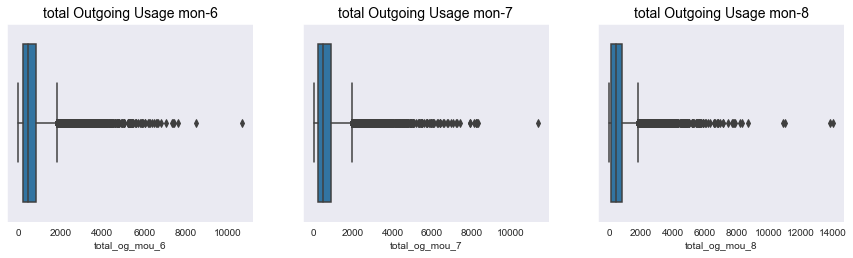

In [212]:
plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.boxplot(high_value_eda['total_og_mou_6'])
ax.set_title('total Outgoing Usage mon-6',fontsize=14,color='black')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.boxplot(high_value_eda['total_og_mou_7'])
ax.set_title('total Outgoing Usage mon-7',fontsize=14,color='black')
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.boxplot(high_value_eda['total_og_mou_8'])
ax.set_title('total Outgoing Usage mon-8',fontsize=14,color='black')
plt.show();

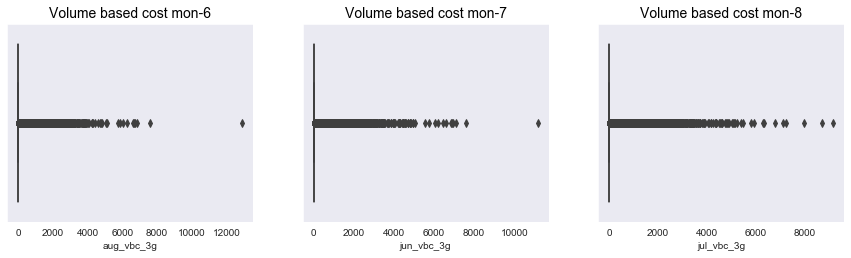

In [213]:
plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.boxplot(high_value_eda['aug_vbc_3g'])
ax.set_title('Volume based cost mon-6',fontsize=14,color='black')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.boxplot(high_value_eda['jun_vbc_3g'])
ax.set_title('Volume based cost mon-7',fontsize=14,color='black')
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.boxplot(high_value_eda["jul_vbc_3g"])
ax.set_title('Volume based cost mon-8',fontsize=14,color='black')
plt.show();

#### The Volume based cost has been on increasing trend , indicating  that increasingly no specific sheme was purchased

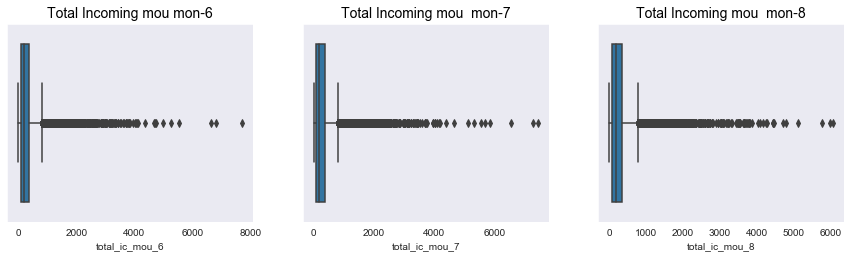

In [214]:
plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.boxplot(high_value_eda['total_ic_mou_6'])
ax.set_title('Total Incoming mou mon-6',fontsize=14,color='black')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.boxplot(high_value_eda['total_ic_mou_7'])
ax.set_title('Total Incoming mou  mon-7',fontsize=14,color='black')
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.boxplot(high_value_eda["total_ic_mou_8"])
ax.set_title('Total Incoming mou  mon-8',fontsize=14,color='black')
plt.show();

####  The Total Recharge Amount was on rise in mon 7 and it sharply declined in action phase month mon 8 .

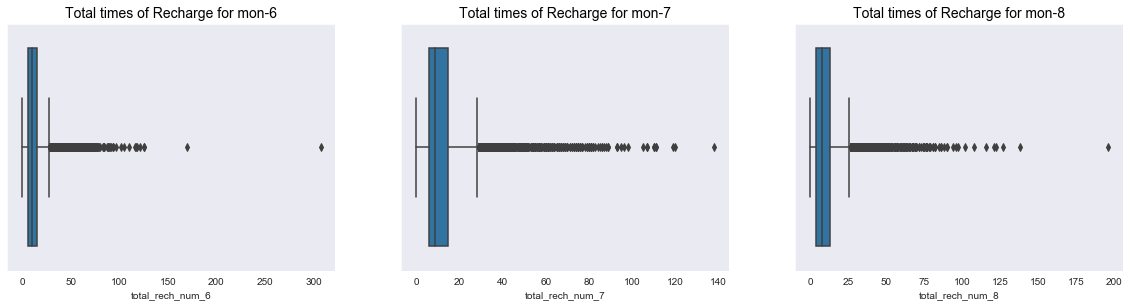

In [215]:
plt.figure(figsize=(20,10),facecolor='w')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.boxplot(high_value_eda['total_rech_num_6'])
ax.set_title('Total times of Recharge for mon-6',fontsize=14,color='black')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.boxplot(high_value_eda['total_rech_num_7'])
ax.set_title('Total times of Recharge for mon-7',fontsize=14,color='black')
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.boxplot(high_value_eda['total_rech_num_8'])
ax.set_title('Total times of Recharge for mon-8',fontsize=14,color='black')
plt.show();

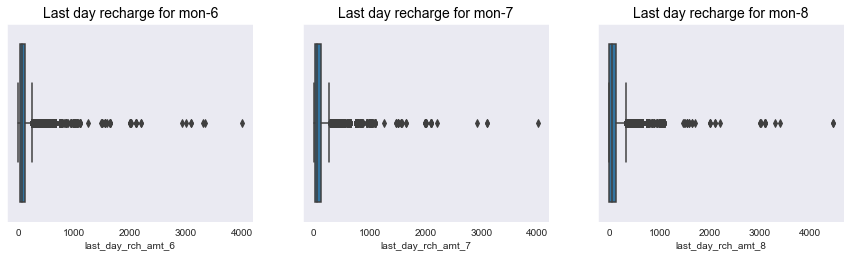

In [216]:
plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.boxplot(high_value_eda['last_day_rch_amt_6'])
ax.set_title('Last day recharge for mon-6',fontsize=14,color='black')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.boxplot(high_value_eda['last_day_rch_amt_7'])
ax.set_title('Last day recharge for mon-7',fontsize=14,color='black')
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.boxplot(high_value_eda['last_day_rch_amt_8'])
ax.set_title('Last day recharge for mon-8',fontsize=14,color='black')
plt.show();

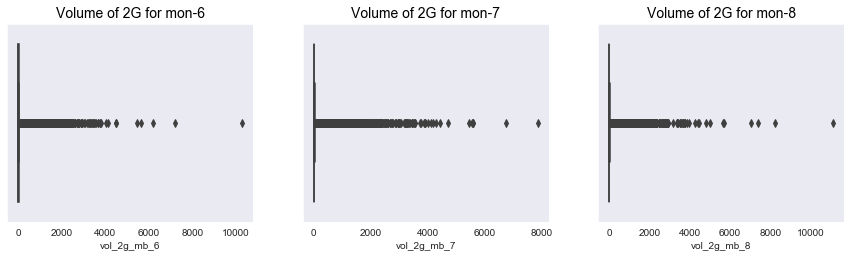

In [217]:
plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.boxplot(high_value_eda['vol_2g_mb_6'])
ax.set_title('Volume of 2G for mon-6',fontsize=14,color='black')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.boxplot(high_value_eda['vol_2g_mb_7'])
ax.set_title('Volume of 2G for mon-7',fontsize=14,color='black')
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.boxplot(high_value_eda['vol_2g_mb_8'])
ax.set_title('Volume of 2G for mon-8',fontsize=14,color='black')
plt.show();

#### There has been a dip in the volume of  2G in mon8 versus mon 7 

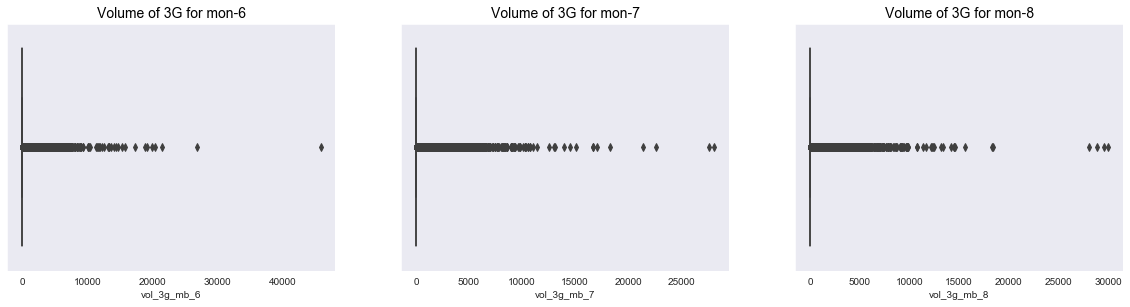

In [218]:
plt.figure(figsize=(20,10),facecolor='w')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.boxplot(high_value_eda['vol_3g_mb_6'])
ax.set_title('Volume of 3G for mon-6',fontsize=14,color='black')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.boxplot(high_value_eda['vol_3g_mb_7'])
ax.set_title('Volume of 3G for mon-7',fontsize=14,color='black')
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.boxplot(high_value_eda['vol_3g_mb_8'])
ax.set_title('Volume of 3G for mon-8',fontsize=14,color='black')
plt.show();

#### The Volume of 3G has been on steady rise and continous in mon 8. 
#### It may be noted that the Volume is on fall for 2G while that for 3G is on rise.

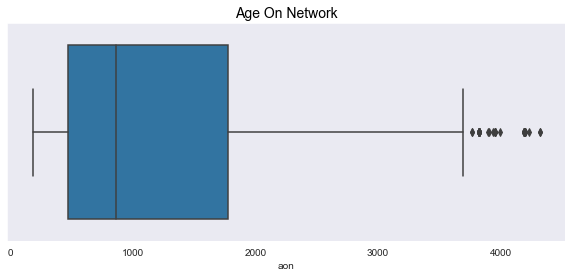

In [219]:
plt.figure(figsize=(10,4),facecolor='w')
sns.set_style("dark")
ay = sns.boxplot(high_value_eda['aon'])
ay.set_title('Age On Network',fontsize=14,color='black')
plt.show();

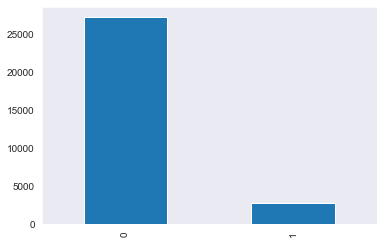

In [220]:
high_value_eda['churn'].value_counts().plot.bar();

<Figure size 2520x2880 with 0 Axes>

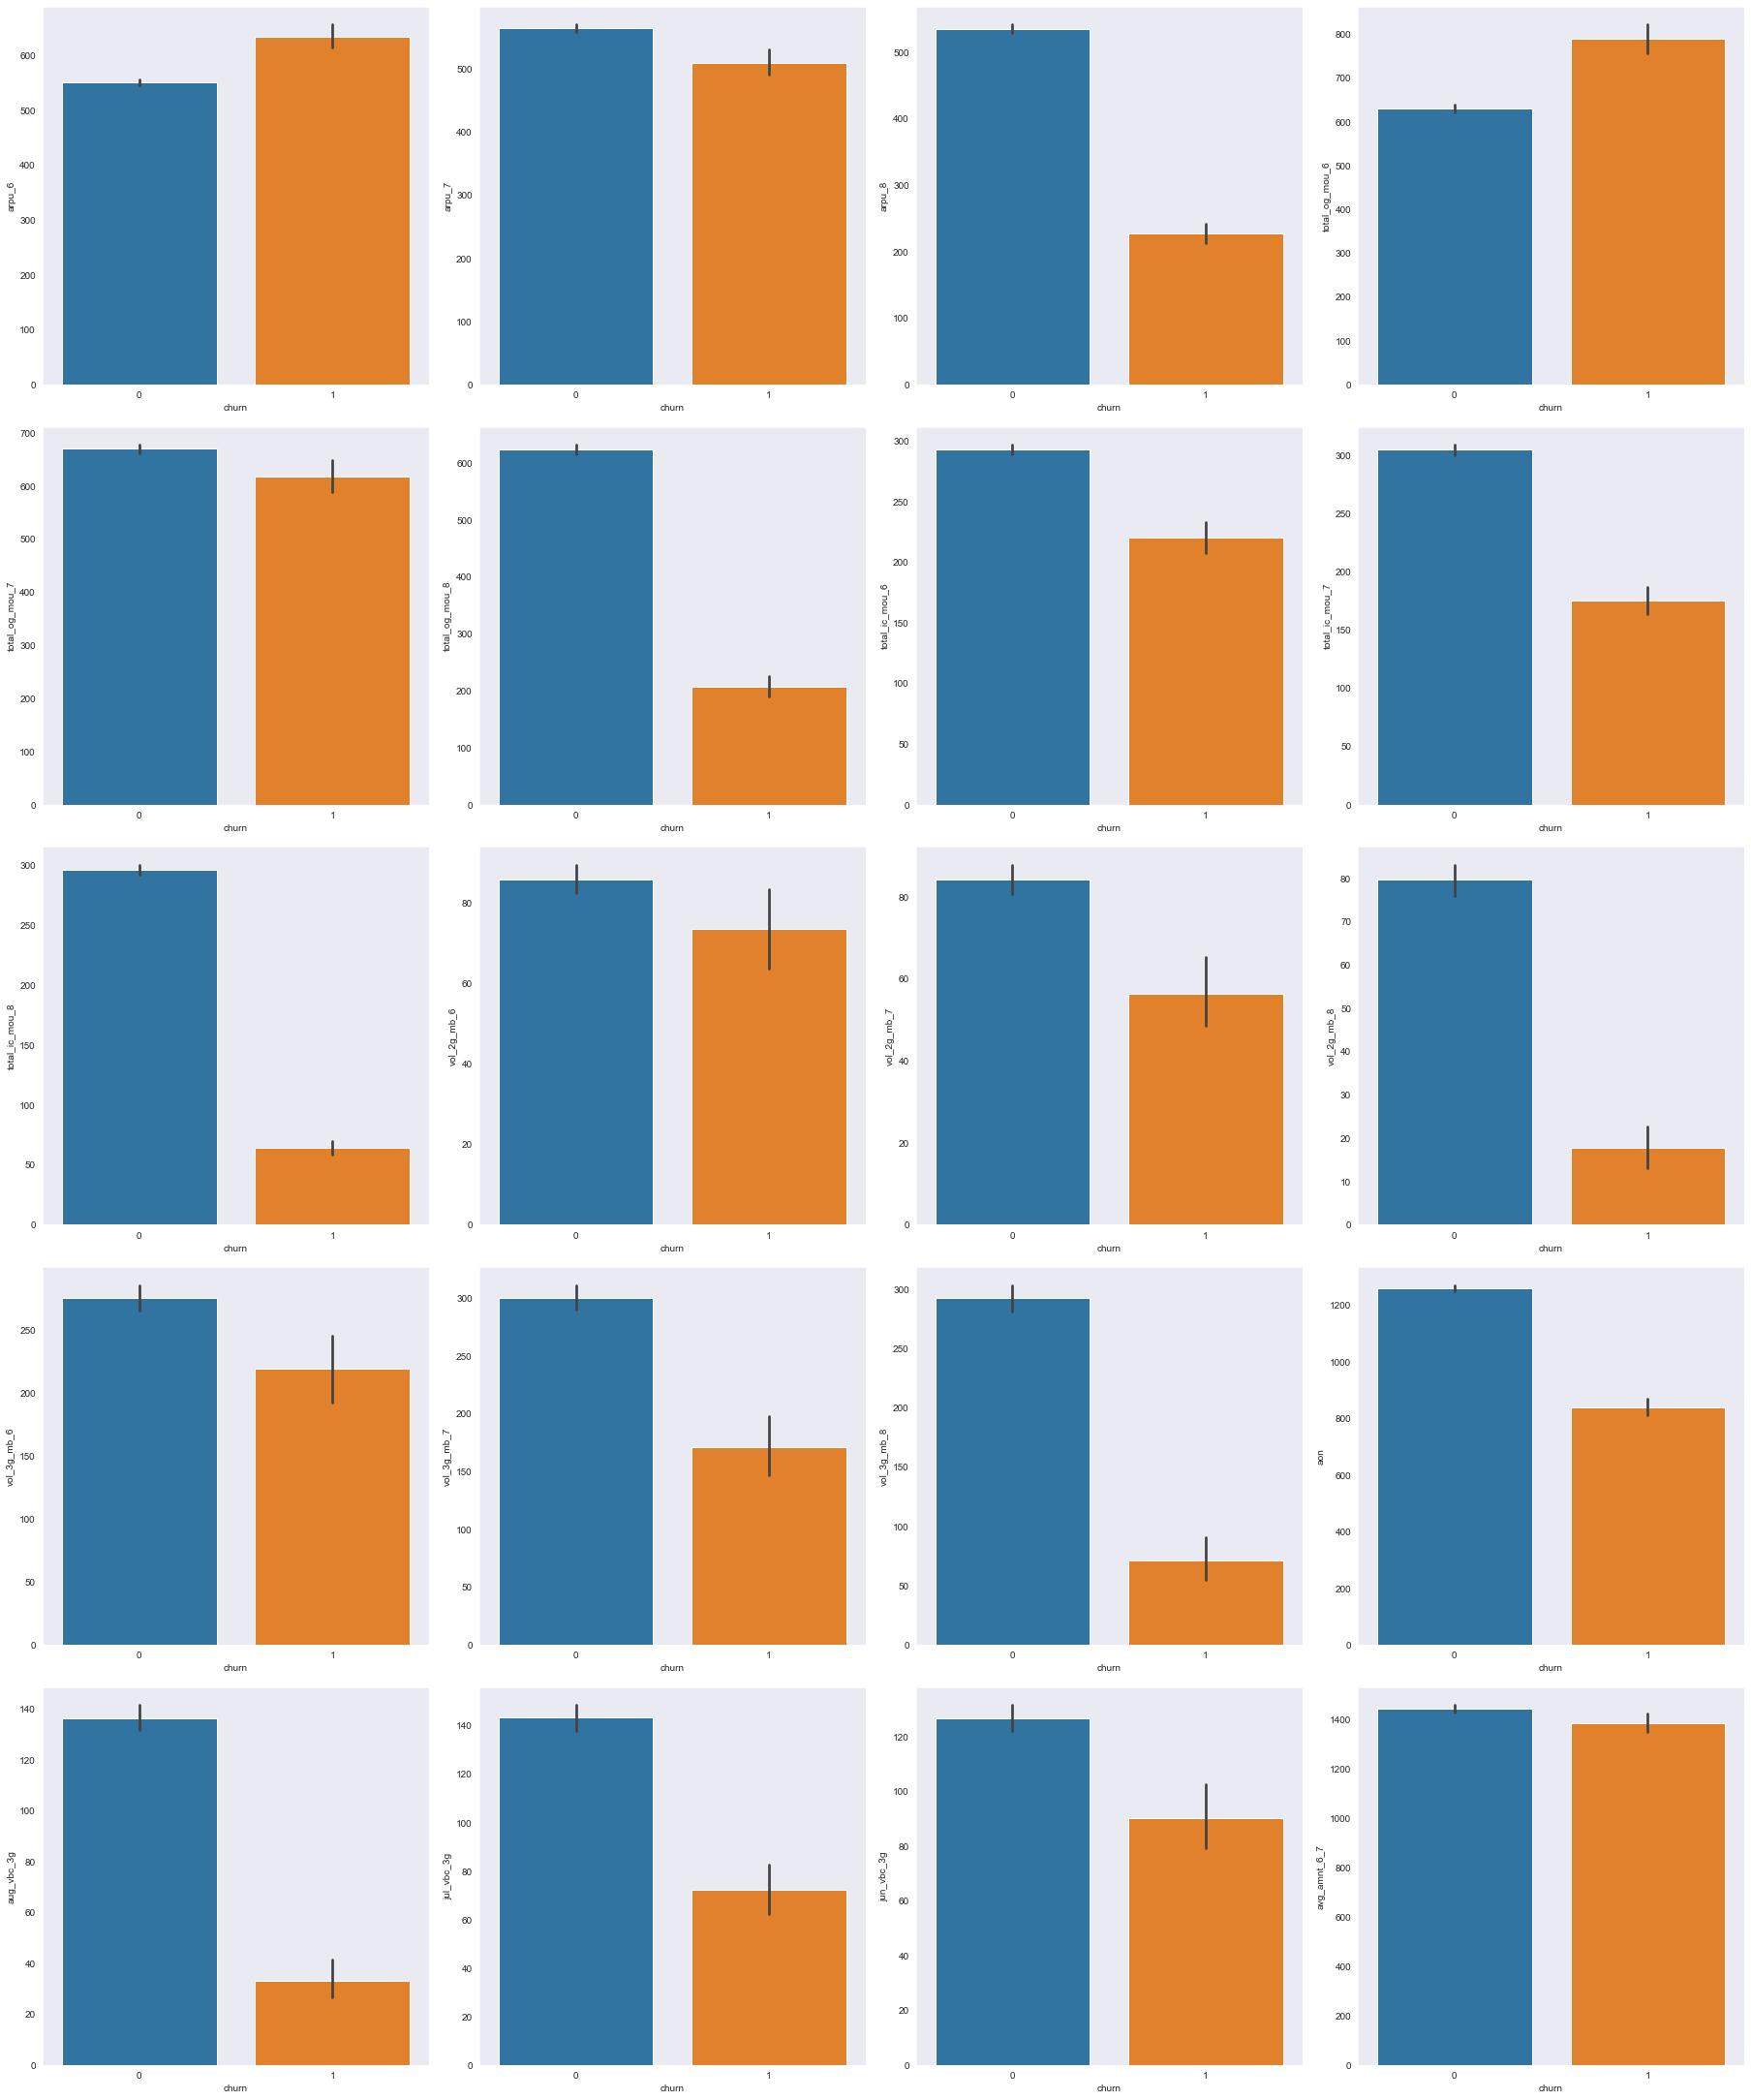

<Figure size 2520x2880 with 0 Axes>

In [227]:
fig , axes = plt.subplots(nrows= 5, ncols=4, figsize=(25,30),constrained_layout=True)
columns = ['arpu_6','arpu_7','arpu_8','total_og_mou_6','total_og_mou_7','total_og_mou_8',
           'total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
           'vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8',
           'vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
           'aon','aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','avg_amnt_6_7']
plt.figure(figsize = (35, 40));
for i, column in enumerate(columns):
    ax=sns.barplot(x='churn', y = column,data = high_value_eda,ax=axes[i//4,i%4]);
    

**`HeatMap`**

In [235]:
df = high_value_eda[columns]
corr_matrix = df.corr()

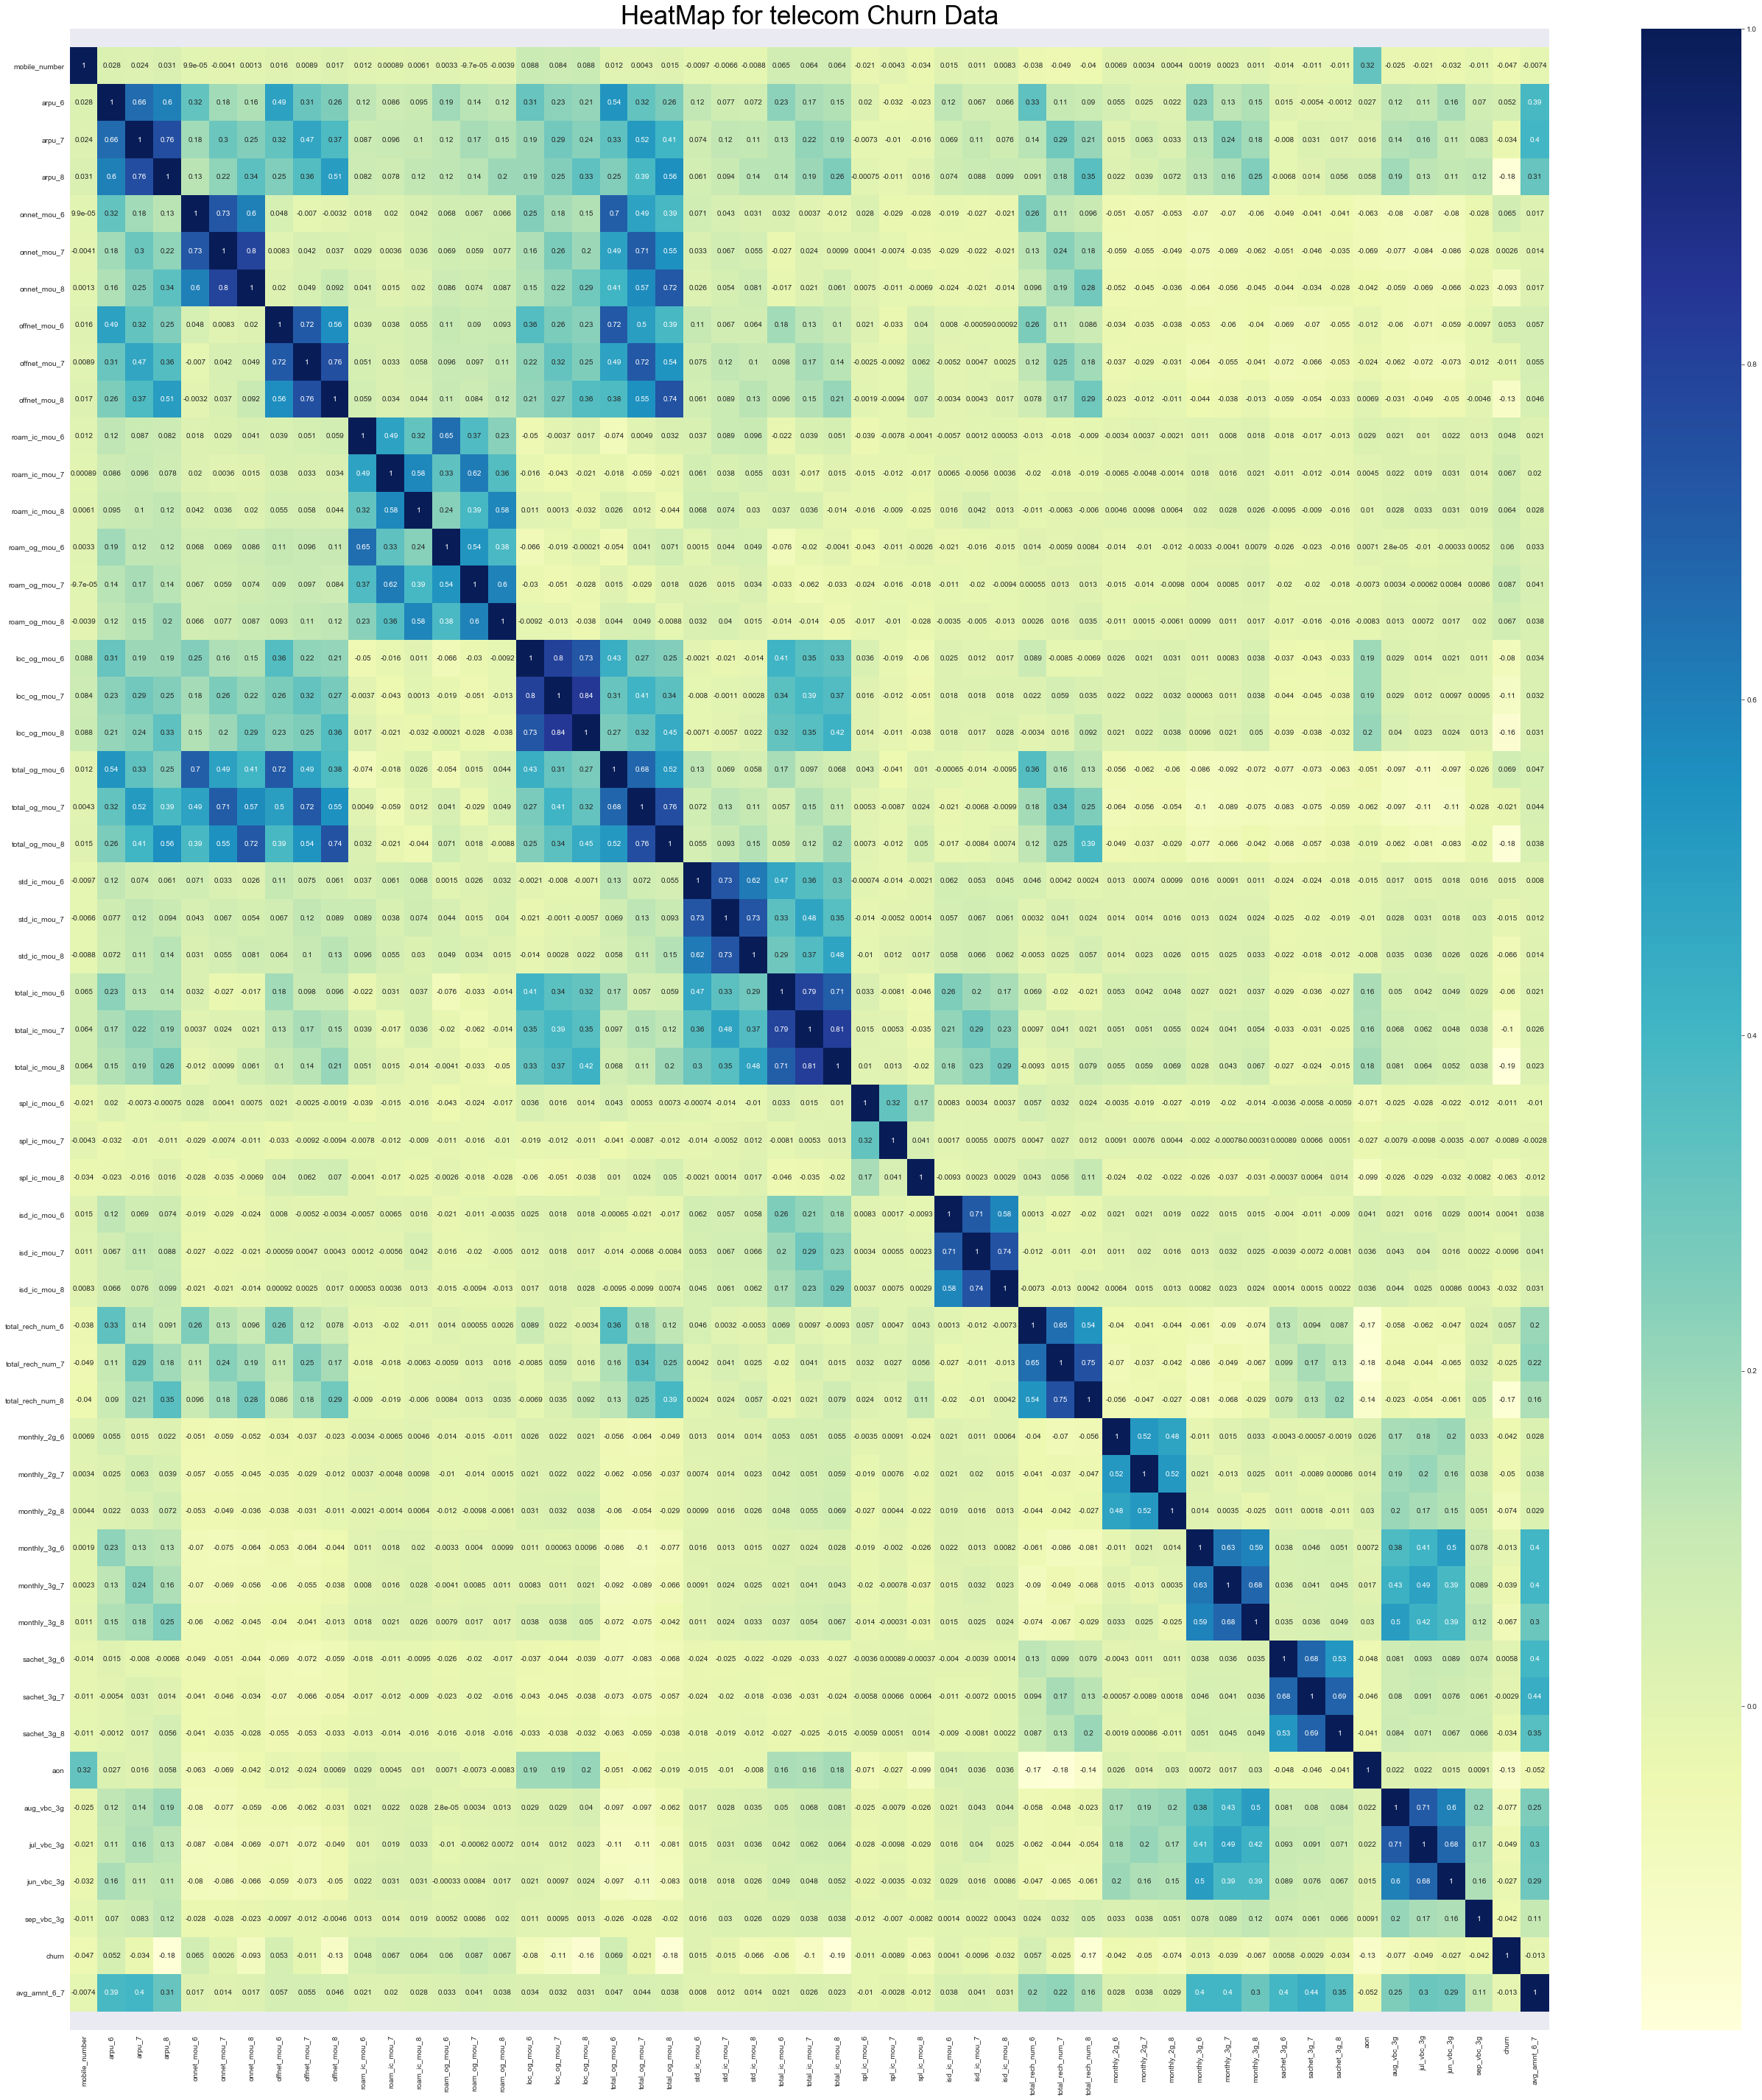

In [237]:
plt.figure(figsize = (45, 50))
plt.xticks(rotation=60)
ax= sns.heatmap(corr_matrix, annot = True, cmap="YlGnBu" )

top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
ax.set_title("HeatMap for telecom Churn Data",fontsize=35,color='black')
plt.show();

#### Outliers Analysis

In [238]:
high_value_b4model = high_value.copy()

`Dropping the mobile number column, as it is not useful in the model`

In [239]:
high_value.drop('mobile_number',axis=1,inplace=True)

In [240]:
high_value.shape

(30013, 135)

In [241]:
high_value.describe([0.01,0.05,0.10,0.75,0.90,0.95,0.97,0.98,0.99,0.995])

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
count 30013.00 30013.00 30013.00     30013.00     30013.00     30013.00   
mean    558.95   559.73   506.22       276.96       284.92       251.08   
std     457.06   477.27   499.63       454.32       475.27       457.39   
min   -2258.71 -2014.05  -945.81         0.00         0.00         0.00   
1%        0.10     0.00     0.00         0.00         0.00         0.00   
5%      124.77   125.54     7.61         0.18         0.18         0.00   
10%     198.78   204.08    88.43         4.68         4.48         2.49   
50%     469.06   465.20   417.03       108.36       106.69        83.59   
75%     694.93   693.36   651.07       324.48       330.31       273.31   
90%     990.97   994.36   971.85       761.63       787.20       690.95   
95%    1239.68  1261.03  1252.57      1126.17      1173.43      1080.65   
97%    1459.65  1472.74  1470.08      1423.68      1473.00      1402.34   
98%    1628.55  1644.33  1656.79      1660.89      1738.44      1649.23   
99%    1984.88  1999.35  1987.91      2131.79      2178.38      2136.93   
99.5%  2426.57  2386.99  2414.83      2710.79      2764.90      2711.35   
max   27731.09 35145.83 33543.62      7376.71      8157.78     10752.56   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
count      30013.00      30013.00      30013.00       30013.00       30013.00   
mean         395.52        400.33        355.90          16.27          12.51   
std          473.93        490.53        475.47          76.49          72.42   
min            0.00          0.00          0.00           0.00           0.00   
1%             0.00          0.00          0.00           0.00           0.00   
5%             8.23          8.09          2.77           0.00           0.00   
10%           30.13         29.58         17.69           0.00           0.00   
50%          259.86        255.38        214.46           0.00           0.00   
75%          502.94        508.63        459.23           0.00           0.00   
90%          894.45        919.38        831.17          28.31          15.43   
95%         1256.61       1270.83       1172.95          87.19          56.85   
97%         1568.68       1580.51       1463.71         148.90         108.16   
98%         1828.54       1838.39       1723.97         211.55         156.47   
99%         2324.96       2409.95       2192.81         341.17         276.31   
99.5%       2746.18       2894.04       2800.11         483.67         424.87   
max         8362.36       9667.13      14007.34        2589.09        3813.29   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count       30013.00       30013.00       30013.00       30013.00   
mean           12.23          27.79          20.93          20.29   
std            68.81         117.35          96.79         105.09   
min             0.00           0.00           0.00           0.00   
1%              0.00           0.00           0.00           0.00   
5%              0.00           0.00           0.00           0.00   
10%             0.00           0.00           0.00           0.00   
50%             0.00           0.00           0.00           0.00   
75%             0.00           0.00           0.00           0.00   
90%            15.66          55.25          35.98          31.47   
95%            56.47         157.44         108.61         104.54   
97%           103.07         261.39         192.01         178.99   
98%           157.34         357.08         271.02         253.51   
99%           276.59         536.85         440.41         424.07   
99.5%         409.05         766.57         677.78         627.28   
max          2898.34        3775.11        2812.04        5337.04   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
count          30013.00          30013.00          30013.00          30013.00   
mean              

**`From the summary statistics above, we can clearly observe there are outliers all the variables in the data. 
After 99th percentile (99%) of every variable there is a high raise in the values and below 5th percentile (%5) there is drop in the values.`**

**`So...instead of removing the outliers, replacing the outliers below 5% with 5th percentile and 
above 99% with 99th percentile values.`**

In [242]:
def cap_outliers(df):
    
    """This function maks the outliers in the data and caps them with 95th percentile and 5th percentile values."""
    
    for col in df:
        if col!='churn':
            percentiles = df[col].quantile([0.05,0.95]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
    
    print('Outliers are capped with 5% and 95% the boundary values')
    return df

In [243]:
cap_outliers(high_value)

arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0      429.02  190.70  255.11        71.03        45.03        76.66   
1     1069.18 1261.03 1252.57        57.84        54.68        52.29   
2      378.72  492.22  137.36       413.69       351.03        35.08   
3      492.85  205.67  593.26       501.76       108.39       534.24   
4      430.98  299.87  187.89        50.51        74.01        70.61   
...       ...     ...     ...          ...          ...          ...   
30008 1090.08  659.30  974.76       196.99        70.01       251.91   
30009  292.93  641.11  303.17        18.43        99.61         4.96   
30010  414.30  321.09  371.02        17.56         0.18         1.30   
30011  644.97  455.23  564.33       806.73       549.36       775.41   
30012  322.99  303.39  606.82         0.18         0.18         0.00   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0            262.73         49.24         92.08           0.00           0.00   
1            453.43        567.16        325.91          16.23          33.49   
2             94.66         80.63        136.48           0.00           0.00   
3            413.31        119.28        482.46          23.53          56.85   
4            296.29        229.74        162.76           0.00           2.83   
...             ...           ...           ...            ...            ...   
30008       1222.56        692.49        707.68           5.58           0.00   
30009        510.24       1123.56        462.19           0.00           0.00   
30010        428.41        366.78        360.58           0.00           0.00   
30011        784.76        617.13        595.44           0.00           0.00   
30012          8.23          8.09          2.77           0.00           0.00   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0               0.00           0.00           0.00           0.00   
1              31.64          23.74          12.59          38.06   
2               0.00           0.00           0.00           0.00   
3              56.47           7.98          35.26           1.44   
4               0.00           0.00          17.74           0.00   
...              ...            ...            ...            ...   
30008           0.00          31.06           0.00           0.00   
30009           0.00           0.06           0.00           0.00   
30010           0.00           0.00           0.00           0.00   
30011           0.00           0.00           0.00           0.00   
30012           0.00           0.00           0.00           0.00   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0                 71.03             45.03             76.14            252.23   
1                 51.39             31.38             40.28            308.63   
2                297.13            217.59             12.49             80.96   
3                 49.63              6.19             36.01            151.13   
4                 42.61             65.16             67.38            273.29   
...                 ...               ...               ...               ...   
30008              8.81              2.71             14.19            181.56   
30009              0.00              0.00              0.00              7.49   
30010             10.11              0.00              0.00            403.08   
30011            317.84            318.31            297.13            574.93   
30012              0.00              0.00              0.00              0.00   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0                 48.71             80.63             10.38              0.00   
1                447.38            162.28             31.51             31.93   
2                 70.58             50.54              0.00              0.00   
3                 47.28            294.46  

**`Note: Tried treating outliers with +-3 Standard Deviation method, IQR method. But these methods did not helped in solving the problem fully.`**

**`Also Tried with multiple percentile like 5% as low and 99%, 98%, 97% as high thresholds, finally used 5% as lower threshold and 95% as upperr threshold and capped them with these thresholds.`**

In [244]:
missing_ratio(high_value)

Missing value percentage in data are :

arpu_6 : 0.0 %
arpu_7 : 0.0 %
arpu_8 : 0.0 %
onnet_mou_6 : 0.0 %
onnet_mou_7 : 0.0 %
onnet_mou_8 : 0.0 %
offnet_mou_6 : 0.0 %
offnet_mou_7 : 0.0 %
offnet_mou_8 : 0.0 %
roam_ic_mou_6 : 0.0 %
roam_ic_mou_7 : 0.0 %
roam_ic_mou_8 : 0.0 %
roam_og_mou_6 : 0.0 %
roam_og_mou_7 : 0.0 %
roam_og_mou_8 : 0.0 %
loc_og_t2t_mou_6 : 0.0 %
loc_og_t2t_mou_7 : 0.0 %
loc_og_t2t_mou_8 : 0.0 %
loc_og_t2m_mou_6 : 0.0 %
loc_og_t2m_mou_7 : 0.0 %
loc_og_t2m_mou_8 : 0.0 %
loc_og_t2f_mou_6 : 0.0 %
loc_og_t2f_mou_7 : 0.0 %
loc_og_t2f_mou_8 : 0.0 %
loc_og_t2c_mou_6 : 0.0 %
loc_og_t2c_mou_7 : 0.0 %
loc_og_t2c_mou_8 : 0.0 %
loc_og_mou_6 : 0.0 %
loc_og_mou_7 : 0.0 %
loc_og_mou_8 : 0.0 %
std_og_t2t_mou_6 : 0.0 %
std_og_t2t_mou_7 : 0.0 %
std_og_t2t_mou_8 : 0.0 %
std_og_t2m_mou_6 : 0.0 %
std_og_t2m_mou_7 : 0.0 %
std_og_t2m_mou_8 : 0.0 %
std_og_t2f_mou_6 : 0.0 %
std_og_t2f_mou_7 : 0.0 %
std_og_t2f_mou_8 : 0.0 %
std_og_mou_6 : 0.0 %
std_og_mou_7 : 0.0 %
std_og_mou_8 : 0.0 %
isd_og_mo

In [245]:
high_value.describe([0.01,0.05,0.10,0.75,0.90,0.95,0.97,0.98,0.99])

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
count 30013.00 30013.00 30013.00     30013.00     30013.00     30013.00   
mean    534.89   535.99   478.19       244.21       250.83       216.11   
std     295.32   298.97   326.28       313.67       326.25       296.60   
min     124.77   125.54     7.61         0.18         0.18         0.00   
1%      124.77   125.54     7.61         0.18         0.18         0.00   
5%      124.77   125.55     7.61         0.18         0.18         0.00   
10%     198.78   204.08    88.43         4.68         4.48         2.49   
50%     469.06   465.20   417.03       108.36       106.69        83.59   
75%     694.93   693.36   651.07       324.48       330.31       273.31   
90%     990.97   994.36   971.85       761.63       787.20       690.95   
95%    1239.64  1260.94  1252.54      1126.16      1173.30      1080.40   
97%    1239.68  1261.03  1252.57      1126.17      1173.43      1080.65   
98%    1239.68  1261.03  1252.57      1126.17      1173.43      1080.65   
99%    1239.68  1261.03  1252.57      1126.17      1173.43      1080.65   
max    1239.68  1261.03  1252.57      1126.17      1173.43      1080.65   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
count      30013.00      30013.00      30013.00       30013.00       30013.00   
mean         362.44        365.54        321.80           8.00           4.88   
std          339.52        345.50        321.74          21.83          14.08   
min            8.23          8.09          2.77           0.00           0.00   
1%             8.23          8.09          2.77           0.00           0.00   
5%             8.24          8.10          2.78           0.00           0.00   
10%           30.13         29.58         17.69           0.00           0.00   
50%          259.86        255.38        214.46           0.00           0.00   
75%          502.94        508.63        459.23           0.00           0.00   
90%          894.45        919.38        831.17          28.31          15.43   
95%         1256.61       1270.80       1172.88          87.18          56.84   
97%         1256.61       1270.83       1172.95          87.19          56.85   
98%         1256.61       1270.83       1172.95          87.19          56.85   
99%         1256.61       1270.83       1172.95          87.19          56.85   
max         1256.61       1270.83       1172.95          87.19          56.85   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count       30013.00       30013.00       30013.00       30013.00   
mean            4.88          15.01           9.82           9.25   
std            13.97          39.99          27.36          26.15   
min             0.00           0.00           0.00           0.00   
1%              0.00           0.00           0.00           0.00   
5%              0.00           0.00           0.00           0.00   
10%             0.00           0.00           0.00           0.00   
50%             0.00           0.00           0.00           0.00   
75%             0.00           0.00           0.00           0.00   
90%            15.66          55.25          35.98          31.47   
95%            56.46         157.38         108.59         104.52   
97%            56.47         157.44         108.61         104.54   
98%            56.47         157.44         108.61         104.54   
99%            56.47         157.44         108.61         104.54   
max            56.47         157.44         108.61         104.54   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
count          30013.00          30013.00          30013.00          30013.00   
mean              62.51             63.02             57.93            151.05   
std               85.20             85.14             80.07            169.92   
min                0.00              0.00              0.00              0.00   


### Splitting Data

**`Will be using train_test_split module from scikitlearn to split data into train and test sets.`**

In [246]:
high_value_b4split = high_value.copy()

In [247]:
np.random.seed(0)

telecom_train,telecom_test = train_test_split(high_value, train_size=0.7, random_state=20, shuffle=True, stratify=high_value['churn'])

In [248]:
telecom_train.shape
telecom_test.shape

(21009, 135)

(9004, 135)

### Feature Scaling

**`Before that we separate the X and Y data.`**

**`Will be using StandardScaler from Scikitlearn library to scale.`**

In [249]:
telco_train_b4scale = telecom_train.copy()

In [250]:
telco_test_b4scale = telecom_test.copy()

In [251]:
def standard_scaling(train,test):
    
    '''Separating the data into X,y and applying standardisation scaling on the train data and test data'''
    
    train_cp = train.copy()
    test_cp = test.copy()
    
    y_train = train_cp.pop('churn')
    X_train = train_cp
    
    y_test = test_cp.pop('churn')
    X_test = test_cp
    
    train_cols = X_train.columns.tolist()
    
    #applying scaling here
    scale = StandardScaler()

    X_train = scale.fit_transform(X_train)
    X_train = pd.DataFrame(X_train,columns=train_cols)
    
    X_test = scale.transform(X_test)
    X_test = pd.DataFrame(X_test,columns=train_cols)
    
    print('Feature scaling has been completed')

    return X_train,y_train,X_test,y_test

In [252]:
X_train,y_train,X_test,y_test = standard_scaling(telecom_train,telecom_test)

In [253]:
X_train.head(2)
y_train.head(2)
X_test.head(2)
y_test.head(2)

arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   -0.51   -1.37   -0.95        -0.78        -0.76        -0.73   
1    0.03   -0.96   -0.37        -0.72        -0.76        -0.65   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         -1.04         -1.03         -0.99          -0.36          -0.35   
1          2.50          0.28          1.04          -0.36          -0.30   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0          -0.35          -0.37          -0.36          -0.35   
1           0.04          -0.37          -0.32          -0.11   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0             -0.73             -0.74             -0.72             -0.89   
1             -0.70             -0.73             -0.60             -0.80   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             -0.91             -0.87             -0.52             -0.52   
1             -0.89             -0.68             -0.52             -0.52   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  ...  monthly_2g_7  monthly_2g_8  \
0             -0.51             -0.41  ...         -0.30          3.44   
1             -0.51             -0.41  ...         -0.30         -0.29   

   sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  \
0         0.21        -0.41        -0.43          2.85         -0.35   
1        -0.41        -0.41        -0.43         -0.35         -0.35   

   monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8   aon  aug_vbc_3g  \
0         -0.35         3.31        -0.30        -0.27  2.07        2.69   
1         -0.35        -0.30        -0.30        -0.27 -0.22       -0.42   

   jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  total_rech_data_6  total_rech_data_7  \
0        0.48        3.05       -0.26               0.20              -0.73   
1       -0.43       -0.41       -0.26              -0.18              -0.20   

   av_rech_amt_data_6  av_rech_amt_data_7  total_amnt_data_6  \
0                3.17                2.00               2.96   
1               -0.24               -0.30              -0.28   

   total_amnt_data_7  total_recharge_amount_6  total_recharge_amount_7  \
0               0.07                     1.94                    -0.94   
1              -0.32                    -0.23                    -0.87   

   avg_amnt_6_7  
0          0.49  
1         -0.66  

[2 rows x 134 columns]

29715    0
5331     0
Name: churn, dtype: int32

arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   -0.14    0.00   -0.13        -0.56        -0.52        -0.44   
1   -0.45    1.87    1.79        -0.72         0.67         0.52   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         -0.86         -0.68         -0.62          -0.36          -0.35   
1          0.27         -0.46         -0.33           0.95           3.45   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0          -0.35          -0.37          -0.36          -0.35   
1          -0.35           3.57           3.60          -0.35   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              0.08              0.20              0.14             -0.65   
1             -0.70              0.63              3.01              0.13   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             -0.31             -0.51             -0.52             -0.52   
1             -0.59             -0.07             -0.52             -0.52   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  ...  monthly_2g_7  monthly_2g_8  \
0             -0.51             -0.41  ...         -0.30         -0.29   
1              0.54             -0.41  ...          3.38         -0.29   

   sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  \
0         2.06         1.15         0.83         -0.35         -0.35   
1        -0.41        -0.41        -0.43         -0.35          2.85   

   monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8   aon  aug_vbc_3g  \
0         -0.35        -0.30        -0.30        -0.27 -0.27       -0.33   
1          2.89        -0.30        -0.30        -0.27  1.27        3.25   

   jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  total_rech_data_6  total_rech_data_7  \
0        0.56        2.39       -0.26               0.91              -0.00   
1        3.26       -0.41       -0.26              -0.65              -0.61   

   av_rech_amt_data_6  av_rech_amt_data_7  total_amnt_data_6  \
0                1.95                0.71               2.09   
1                1.91                2.40               0.21   

   total_amnt_data_7  total_recharge_amount_6  total_recharge_amount_7  \
0               0.33                     1.44                     0.25   
1               0.36                    -0.34                     1.32   

   avg_amnt_6_7  
0          0.93  
1          0.59  

[2 rows x 134 columns]

11208    0
16439    0
Name: churn, dtype: int32

In [254]:
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(21009, 134)

(21009,)

(9004, 134)

(9004,)

### Model building with PCA

In [255]:
pca = PCA(random_state=20)

`Fitting PCA on train data`

In [256]:
pca.fit(X_train)

PCA(random_state=20)

In [257]:
colnames = X_train.columns.tolist()
principal_components_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                        'PC4':pca.components_[3],'PC5':pca.components_[4],'PC6':pca.components_[5],
                        'PC7':pca.components_[6],'PC8':pca.components_[7],'PC9':pca.components_[8],
                        'PC10':pca.components_[9],'PC11':pca.components_[10],'PC12':pca.components_[11],
                        'PC13':pca.components_[12],'PC14':pca.components_[13],'PC15':pca.components_[14],
                        'PC16':pca.components_[15],'PC17':pca.components_[16],'PC18':pca.components_[17],
                        'PC19':pca.components_[18],'PC20':pca.components_[19],'Feature':colnames})

In [258]:
principal_components_df

PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11  PC12  \
0    0.12  0.07  0.12  0.01 -0.08  0.05  0.26  0.05  0.10 -0.02  0.02  0.03   
1    0.13  0.09  0.16  0.03 -0.07  0.05 -0.05  0.07  0.03  0.04  0.02 -0.03   
2    0.13  0.08  0.14  0.03 -0.06  0.03 -0.17  0.07 -0.00  0.05  0.02 -0.01   
3    0.03  0.15  0.03  0.03 -0.09 -0.26  0.15  0.03  0.09 -0.04 -0.01  0.04   
4    0.04  0.17  0.05  0.04 -0.09 -0.28 -0.03  0.03  0.05 -0.02 -0.02  0.02   
5    0.05  0.16  0.06  0.04 -0.09 -0.26 -0.11  0.04  0.03 -0.01 -0.03  0.02   
6    0.10  0.11  0.01  0.03 -0.02  0.28  0.17 -0.02  0.01 -0.06 -0.01  0.03   
7    0.10  0.13  0.03  0.03 -0.01  0.29 -0.04 -0.01 -0.05 -0.03 -0.02  0.00   
8    0.12  0.12  0.04  0.04 -0.02  0.25 -0.14  0.01 -0.07 -0.01 -0.02  0.01   
9    0.02  0.02  0.04 -0.08  0.05  0.00 -0.01  0.31 -0.10  0.06  0.07 -0.08   
10   0.01  0.02  0.04 -0.10  0.05  0.01  0.09  0.34 -0.07  0.04  0.10 -0.09   
11   0.02  0.02  0.05 -0.09  0.05  0.01  0.10  0.31 -0.05  0.04  0.09 -0.06   
12   0.01  0.04  0.04 -0.08  0.02  0.01 -0.01  0.32 -0.10  0.05  0.07 -0.08   
13   0.00  0.04  0.04 -0.09  0.02  0.02  0.10  0.35 -0.06  0.03  0.09 -0.09   
14   0.01  0.04  0.05 -0.08  0.02  0.02  0.10  0.31 -0.04  0.04  0.08 -0.06   
15   0.14 -0.02 -0.07  0.08 -0.08 -0.09  0.09  0.07 -0.00  0.04 -0.03  0.02   
16   0.14 -0.01 -0.06  0.08 -0.09 -0.09  0.00  0.08 -0.03  0.06 -0.03  0.00   
17   0.15 -0.01 -0.05  0.08 -0.08 -0.09 -0.05  0.08 -0.04  0.05 -0.03  0.01   
18   0.16 -0.04 -0.08  0.07 -0.07  0.09  0.09  0.02  0.02 -0.03 -0.01 -0.00   
19   0.17 -0.03 -0.07  0.07 -0.06  0.09 -0.02  0.03 -0.01 -0.01 -0.01 -0.02   
20   0.17 -0.03 -0.06  0.07 -0.06  0.08 -0.08  0.04 -0.02 -0.00 -0.02 -0.01   
21   0.11 -0.06 -0.02 -0.07  0.02  0.02 -0.02  0.01  0.18 -0.17  0.02 -0.04   
22   0.12 -0.06 -0.02 -0.07  0.02  0.02 -0.07  0.01  0.17 -0.17  0.02 -0.06   
23   0.12 -0.05 -0.02 -0.06  0.02  0.02 -0.10  0.01  0.15 -0.16  0.02 -0.05   
24   0.00  0.02  0.03  0.05  0.02 -0.01  0.06 -0.06  0.04 -0.05  0.25 -0.15   
25  -0.00  0.02  0.04  0.06  0.02 -0.01 -0.02 -0.04  0.02 -0.04  0.27 -0.17   
26   0.01  0.02  0.04  0.06  0.01 -0.02 -0.05 -0.04 -0.00 -0.03  0.25 -0.16   
27   0.17 -0.04 -0.08  0.08 -0.09  0.02  0.10  0.04  0.03 -0.02 -0.01  0.00   
28   0.18 -0.02 -0.07  0.09 -0.09  0.02 -0.02  0.06 -0.01  0.01 -0.02 -0.02   
29   0.18 -0.02 -0.06  0.08 -0.09  0.02 -0.08  0.06 -0.02  0.01 -0.02 -0.01   
30  -0.02  0.17  0.05  0.00 -0.05 -0.23  0.12 -0.04  0.10 -0.07 -0.01  0.05   
31  -0.02  0.18  0.07  0.01 -0.05 -0.25 -0.04 -0.03  0.07 -0.05 -0.02  0.02   
32  -0.01  0.18  0.07  0.01 -0.05 -0.24 -0.11 -0.03  0.04 -0.03 -0.03  0.03   
33  -0.00  0.16  0.05 -0.01  0.03  0.25  0.14 -0.09 -0.02 -0.05 -0.04  0.07   
34   0.00  0.17  0.06 -0.00  0.03  0.26 -0.03 -0.08 -0.07 -0.02 -0.04  0.04   
35   0.01  0.17  0.07  0.00  0.03  0.22 -0.12 -0.07 -0.08 -0.01 -0.04  0.04   
36   0.06 -0.03 -0.00 -0.09  0.07  0.02 -0.03  0.03  0.13 -0.21 -0.01 -0.06   
37   0.07 -0.03  0.00 -0.09  0.08  0.02 -0.06  0.03  0.13 -0.20 -0.01 -0.07   
38   0.07 -0.03  0.00 -0.08  0.07  0.01 -0.08  0.04  0.11 -0.20 -0.01 -0.07   
39  -0.01  0.21  0.07  0.00 -0.02  0.01  0.17 -0.08  0.07 -0.09 -0.03  0.08   
40  -0.01  0.23  0.09  0.01 -0.02  0.01 -0.05 -0.07  0.01 -0.05 -0.04  0.04   
41   0.00  0.22  0.10  0.01 -0.02 -0.01 -0.15 -0.06 -0.02 -0.03 -0.04  0.05   
42   0.04 -0.02  0.02 -0.06  0.04  0.04  0.00  0.00  0.27  0.19  0.01  0.01   
43   0.03 -0.02  0.02 -0.06  0.05  0.03 -0.04  0.01  0.26  0.21  0.01 -0.00   
44   0.04 -0.02  0.02 -0.05  0.04  0.03 -0.06  0.01  0.25  0.19  0.01 -0.00   
45   0.01  0.03  0.04  0.09  0.03 -0.00  0.10 -0.09  0.06 -0.06  0.28 -0.18   
46   0.00  0.05  0.04  0.11  0.03 -0.01 -0.02 -0.08  0.03 -0.03  0.30 -0.21   
47   0.02  0.05  0.04  0.10  0.03 -0.02 -0.08 -0.08  0.00 -0.03  0.28 -0.19   
48   0.00  0.03 -0.00  0.11  0.01 -0.00  0.11 -0.07  0.02  0.01  0.16 -0.13   
49  -0.00  0.00 -0.00  0.00  0.00 -0.00 -0.00  0.00  0.0

In [259]:
pca.explained_variance_.round(1)

array([18.5, 13.2,  9.1,  7.1,  5.8,  4.4,  3.8,  3.6,  3.4,  2.9,  2.8,
        2.5,  2.3,  2.1,  2. ,  1.9,  1.8,  1.7,  1.6,  1.5,  1.4,  1.3,
        1.3,  1.2,  1.1,  1.1,  1. ,  1. ,  0.9,  0.9,  0.9,  0.9,  0.8,
        0.8,  0.8,  0.8,  0.8,  0.7,  0.7,  0.7,  0.7,  0.6,  0.6,  0.6,
        0.6,  0.6,  0.6,  0.6,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.4,  0.4,  0.4,  0.4,  0.4,  0.4,  0.3,  0.3,
        0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.2,  0.2,
        0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,
        0.2,  0.2,  0.2,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ])

In [260]:
print("pca.explained_variance_ratio_:")
print(pca.explained_variance_ratio_.round(3)*100)

pca.explained_variance_ratio_:
[14.  10.   6.9  5.3  4.4  3.4  2.9  2.7  2.6  2.2  2.1  1.9  1.8  1.6
  1.5  1.5  1.3  1.3  1.2  1.1  1.   1.   1.   0.9  0.8  0.8  0.8  0.8
  0.7  0.7  0.7  0.7  0.6  0.6  0.6  0.6  0.6  0.6  0.5  0.5  0.5  0.5
  0.5  0.5  0.5  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4
  0.4  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.2  0.2  0.2  0.2  0.2
  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.1
  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0. ]


In [261]:
print((pca.explained_variance_ratio_.round(4)).cumsum()*100)

[ 14.05  24.05  30.98  36.33  40.7   44.06  46.97  49.7   52.31  54.53
  56.67  58.59  60.34  61.9   63.39  64.86  66.21  67.48  68.66  69.78
  70.82  71.83  72.78  73.67  74.52  75.33  76.12  76.9   77.62  78.33
  79.    79.66  80.3   80.92  81.52  82.12  82.69  83.25  83.78  84.3
  84.8   85.29  85.77  86.24  86.7   87.14  87.57  87.99  88.4   88.8
  89.2   89.59  89.97  90.35  90.72  91.08  91.44  91.78  92.1   92.41
  92.72  93.01  93.3   93.58  93.83  94.07  94.3   94.53  94.76  94.98
  95.19  95.4   95.6   95.8   95.99  96.18  96.36  96.53  96.7   96.87
  97.04  97.2   97.36  97.51  97.65  97.79  97.93  98.06  98.19  98.31
  98.42  98.53  98.62  98.71  98.8   98.89  98.97  99.05  99.13  99.2
  99.27  99.33  99.39  99.45  99.5   99.55  99.6   99.63  99.66  99.69
  99.72  99.75  99.77  99.79  99.81  99.83  99.85  99.87  99.89  99.91
  99.92  99.93  99.94  99.95  99.96  99.97  99.98  99.99 100.   100.
 100.   100.   100.   100.  ]


`Making a scree plot to observe the explained variance`

In [262]:
var_cumulative = np.cumsum(pca.explained_variance_ratio_)

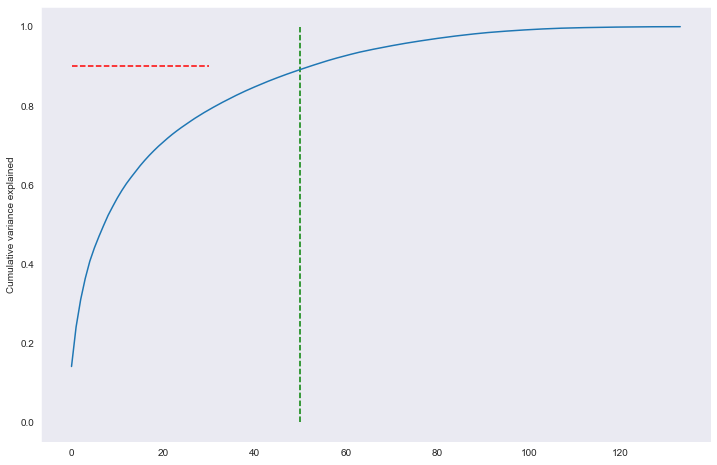

In [263]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=50,ymax=1, ymin=0, colors="g", linestyles="--")
plt.hlines(y=0.90, xmax=30, xmin=0, colors="r", linestyles="--")
plt.plot(var_cumulative)
plt.ylabel("Cumulative variance explained")
plt.show();

`Note: Though Explained variance of 90% is achieved with 50 principal components, there is not much improvement in the model after 25 principal components, so chosen 25 components to build model.`

`Perform PCA with 25 components`

In [264]:
pca_variance_90 = IncrementalPCA(n_components=25)

In [265]:
X_train_pca = pca_variance_90.fit_transform(X_train)

In [266]:
X_train_pca.shape

(21009, 25)

In [267]:
corrmat = np.corrcoef(X_train_pca.transpose())

In [268]:
corrmat.shape

(25, 25)

`Plotting the heatmap of the correlation matrix`

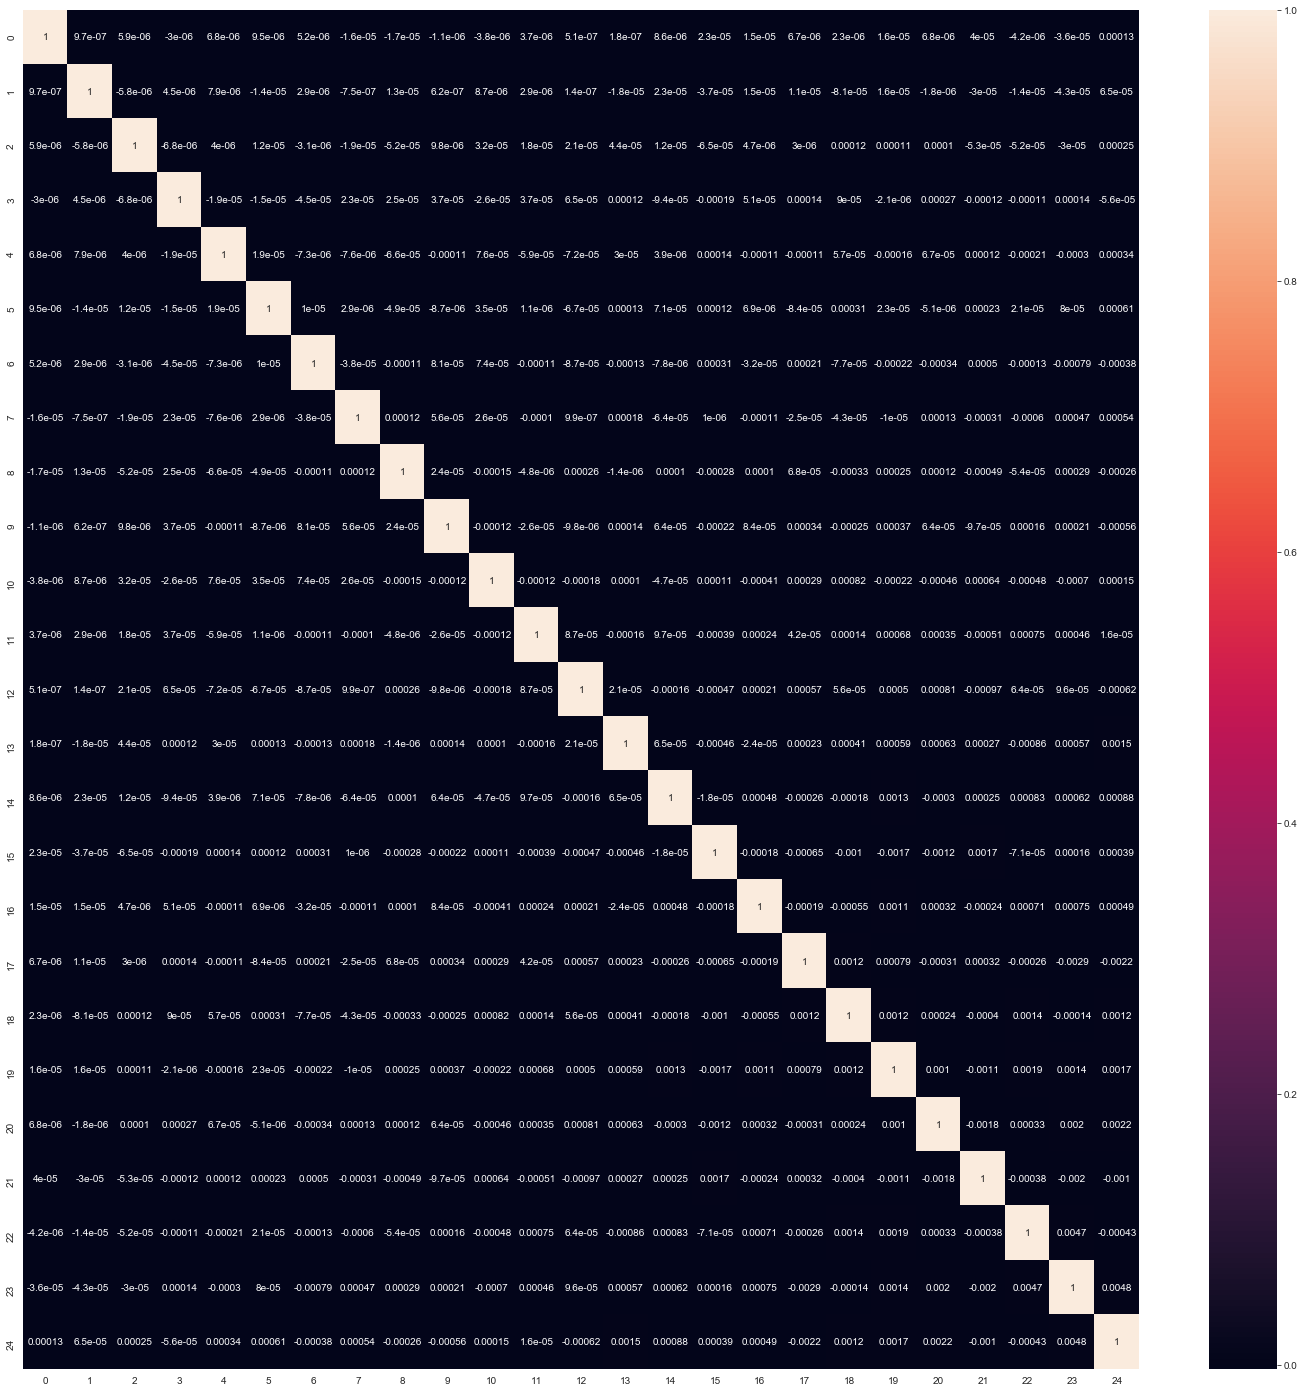

In [269]:
plt.figure(figsize=[25,25])
sns.heatmap(corrmat, annot=True);

`Applying the PCA transformation on the test set`

In [270]:
X_test_pca = pca_variance_90.transform(X_test)
X_test_pca.shape

(9004, 25)

**`Performed PCA with the data after MinMaxScaler scaling, Observed nothing difference in principal components and explained variance with standardscaling and minmaxscaling methods.`**

### Building model on the PCA data

**`Building model with Logistic Regression`**

In [271]:
logreg_pca = LogisticRegression(class_weight='balanced',random_state=20)

In [272]:
model_pca = logreg_pca.fit(X_train_pca, y_train)

**`Building model along with applying Hyperparameter tuning and cross validation`**

In [273]:
#cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=20)
cv = KFold(n_splits=10,random_state=20)

In [274]:
log_model=LogisticRegression()

In [275]:
params_logreg = {'class_weight':['balanced',{0:0.2,1:0.8},{0:0.25,1:0.75},{0:0.3,1:0.7},{0:0.1,1:0.9}]}

In [276]:
grid_logreg_model = GridSearchCV(log_model, 
                               cv = cv,
                               param_grid=params_logreg, 
                               scoring = 'recall', 
                               return_train_score=True,                         
                               verbose = 1)

In [277]:
grid_logreg_model.fit(X_train_pca,y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    7.0s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=20, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'class_weight': ['balanced', {0: 0.2, 1: 0.8},
                                          {0: 0.25, 1: 0.75}, {0: 0.3, 1: 0.7},
                                          {0: 0.1, 1: 0.9}]},
             return_train_score=True, scoring='recall', verbose=1)

In [278]:
grid_logreg_model.best_estimator_

LogisticRegression(class_weight='balanced')

#### `Making predictions on train and test sets`

In [279]:
def model_predictions_df(model,X_train,y_train,X_test,y_test):
    
    """This function takes the model, train and test data as input and makes predictions, and returns
       the dataframes consisting of actual data and predictions and also predicted probability"""
    
    # Train result df
    y_train_predprob = model.predict_proba(X_train)
    y_train_pred = model.predict(X_train)
    train_result_df = pd.DataFrame({'churn':list(y_train),'predicted':list(y_train_pred),
                                    'pred_probability':list(y_train_predprob[:,1])})
    
    # Test result df
    y_test_predprob = model.predict_proba(X_test)
    y_test_pred = model.predict(X_test)
    test_result_df = pd.DataFrame({'churn':list(y_test),'predicted':list(y_test_pred),
                                    'pred_probability':list(y_test_predprob[:,1])})

    return train_result_df, test_result_df

In [280]:
train_result_df, test_result_df = model_predictions_df(grid_logreg_model,X_train_pca,y_train,X_test_pca,y_test)

In [281]:
train_result_df.head()
test_result_df.head()

churn  predicted  pred_probability
0      0          0              0.41
1      0          0              0.41
2      0          0              0.20
3      1          1              0.69
4      0          1              0.65

churn  predicted  pred_probability
0      0          0              0.33
1      0          0              0.05
2      0          1              0.99
3      0          0              0.10
4      0          0              0.05

#### Threshold adjusting

` Creating new column 'predicted_new' with 1 if Churn_Prob>0.4 else 0`

test_result_df['predicted'] = test_result_df.pred_probability.map(lambda x: 1 if x > 0.40 else 0)
test_result_df.head()

In [282]:
test_result_df['predicted_new'] = test_result_df.pred_probability.map(lambda x: 1 if x > 0.40 else 0)
test_result_df.head()

churn  predicted  pred_probability  predicted_new
0      0          0              0.33              0
1      0          0              0.05              0
2      0          1              0.99              1
3      0          0              0.10              0
4      0          0              0.05              0

#### Model Evaluation

In [283]:
def confusion_mat(df1,df2):
    
    '''This function takes takes train result dataframe and test result dataframe and returns confusion matrices for both'''
    
    tarin_confusion = confusion_matrix(df1['churn'],df1['predicted'])
    test_confusion = confusion_matrix(df2['churn'],df2['predicted'])
    
    print('Training set confusion matrix:\n', tarin_confusion)
    print('\n')
    print('Test set confusion matrix:\n', test_confusion)

In [284]:
confusion_mat(train_result_df,test_result_df)

Training set confusion matrix:
 [[15598  3452]
 [  347  1612]]


Test set confusion matrix:
 [[6699 1466]
 [ 135  704]]


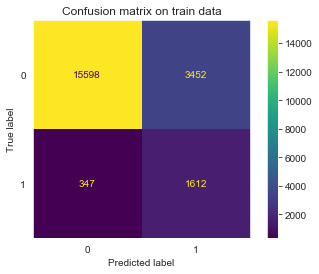

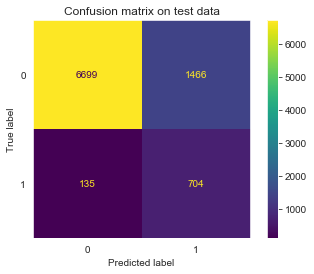

In [285]:
plot_confusion_matrix(model_pca, X_train_pca, y_train);
plt.title('Confusion matrix on train data', size=12);

plot_confusion_matrix(model_pca, X_test_pca, y_test);
plt.title('Confusion matrix on test data', size=12);

#### Evaluating Model with metrics and classification reports

In [286]:
def model_result_report(train_result_df,test_result_df):
    
    '''This function takes training result dataframe and test result dataframe as input and returns 
       various metric values along with classification report'''
    
    # Training set results
    print('Training Accuracy score: {:.2f}'.format(accuracy_score(train_result_df['churn'],train_result_df['predicted'])))
    print('Training Recall/Sensitivity score: {:.2f}'.format(recall_score(train_result_df['churn'],train_result_df['predicted'])))
    print('Training Precision score: {:.2f}'.format(precision_score(train_result_df['churn'],train_result_df['predicted'])))
    print('Training AUC score: {:.2f}'.format(roc_auc_score(train_result_df['churn'],train_result_df['predicted'])))
    print('Training F1 score: {:.2f}'.format(f1_score(train_result_df['churn'],train_result_df['predicted'])))
    print('\n*****************************************************')
        
    # Test set results
    print('Test Accuracy score: {:.2f}'.format(accuracy_score(test_result_df['churn'],test_result_df['predicted'])))
    print('Test Recall/Sensitivity score: {:.2f}'.format(recall_score(test_result_df['churn'],test_result_df['predicted'])))
    print('Test Precision score: {:.2f}'.format(precision_score(test_result_df['churn'],test_result_df['predicted'])))
    print('Test AUC score: {:.2f}'.format(roc_auc_score(test_result_df['churn'],test_result_df['predicted'])))
    print('Test F1 score: {:.2f}'.format(f1_score(test_result_df['churn'],test_result_df['predicted'])))
    print('\n*****************************************************')
    
    # Classification reports
    train_classification_report = classification_report(train_result_df['churn'],train_result_df['predicted'])
    test_classification_report = classification_report(test_result_df['churn'],test_result_df['predicted'])
    
    printmd('**Training classification report:**') 
    print(train_classification_report)
    print('\n*****************************************************')
    printmd('**Test classification report:**') 
    print(test_classification_report)

In [287]:
model_result_report(train_result_df,test_result_df)

Training Accuracy score: 0.82
Training Recall/Sensitivity score: 0.82
Training Precision score: 0.32
Training AUC score: 0.82
Training F1 score: 0.46

*****************************************************
Test Accuracy score: 0.82
Test Recall/Sensitivity score: 0.84
Test Precision score: 0.32
Test AUC score: 0.83
Test F1 score: 0.47

*****************************************************


<span style='color:None'>**Training classification report:**</span>

              precision    recall  f1-score   support

           0       0.98      0.82      0.89     19050
           1       0.32      0.82      0.46      1959

    accuracy                           0.82     21009
   macro avg       0.65      0.82      0.68     21009
weighted avg       0.92      0.82      0.85     21009


*****************************************************


<span style='color:None'>**Test classification report:**</span>

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8165
           1       0.32      0.84      0.47       839

    accuracy                           0.82      9004
   macro avg       0.65      0.83      0.68      9004
weighted avg       0.92      0.82      0.85      9004



In [288]:
def plot_roc(train_result_df,test_result_df):
    train_fpr, train_tpr, train_thresholds = roc_curve(train_result_df['churn'], train_result_df['predicted'], drop_intermediate = False)
    train_auc_score = roc_auc_score(train_result_df['churn'], train_result_df['predicted'])

    test_fpr, test_tpr, test_thresholds = roc_curve(test_result_df['churn'], test_result_df['predicted'], drop_intermediate = False)
    test_auc_score = roc_auc_score(test_result_df['churn'], test_result_df['predicted'])

    
    plt.figure(figsize=(12, 12))
    plt.subplot(2,2,1)
    plt.plot(train_fpr, train_tpr, label='Area under curve = %0.2f' % train_auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate a.k.a Sensitivity')
    plt.title('TRAIN SET ROC Curve')
    plt.legend(loc="lower right")
    
    plt.subplot(2,2,2)
    plt.plot(test_fpr, test_tpr, label='Area under curve = %0.2f' % test_auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate a.k.a Sensitivity')
    plt.title('TEST SET ROC Curve')
    plt.legend(loc="lower right")

    plt.show();

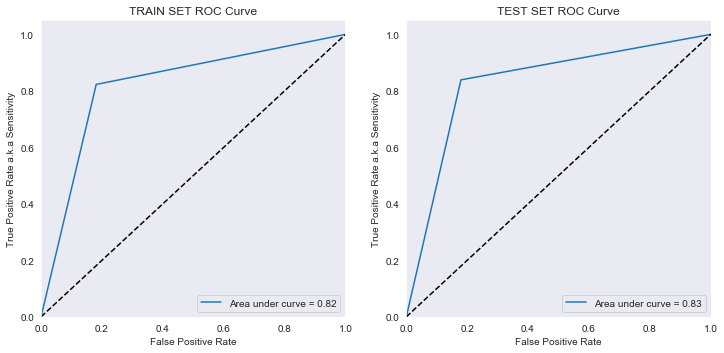

In [289]:
plot_roc(train_result_df,test_result_df)

**`Applying KFold cross validation to check model performance`**

In [290]:
scores = cross_val_score(grid_logreg_model, X_train_pca,y_train,scoring='recall',cv=cv,n_jobs=-1,error_score='raise')

scores

array([0.83919598, 0.80319149, 0.79057592, 0.83606557, 0.81725888,
       0.81860465, 0.80184332, 0.83902439, 0.83977901, 0.79781421])

In [291]:
scores.mean(), scores.std()

(0.8183353415064968, 0.018252813068132954)

#### Model with Random Forest

In [292]:
rf_model_pca = RandomForestClassifier(class_weight='balanced',random_state=20)

In [293]:
rf_model_pca = rf_model_pca.fit(X_train_pca, y_train)

**`Building model along with applying Hyperparameter tuning and cross validation`**

In [294]:
#cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=20)
cv = KFold(n_splits=10,random_state=20)

In [295]:
rf_model2=RandomForestClassifier(random_state=20)

In [296]:
params_rfclf = {'class_weight':['balanced',{0:0.2,1:0.8},{0:0.1,1:0.9}],'n_estimators':[50,100,150],
                'criterion':['gini','entropy'],'max_depth':list(range(1,10,2)),'max_features':['auto','log2']}

In [297]:
grid_rf_model_pca = GridSearchCV(rf_model2, 
                               cv = cv,
                               param_grid=params_rfclf, 
                               scoring = 'recall', 
                               return_train_score=True,
                              n_jobs=-1,verbose = 1)

In [298]:
grid_rf_model_pca.fit(X_train_pca,y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 46.4min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 74.3min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 75.1min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=20, shuffle=False),
             estimator=RandomForestClassifier(random_state=20), n_jobs=-1,
             param_grid={'class_weight': ['balanced', {0: 0.2, 1: 0.8},
                                          {0: 0.1, 1: 0.9}],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7, 9],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True, scoring='recall', verbose=1)

#### `Making predictions on train and test sets`

In [299]:
train_result_df_rf, test_result_df_rf = model_predictions_df(grid_rf_model_pca,X_train_pca,y_train,X_test_pca,y_test)

#### Model Evaluation

In [300]:
confusion_mat(train_result_df_rf,test_result_df_rf)

Training set confusion matrix:
 [[13173  5877]
 [  410  1549]]


Test set confusion matrix:
 [[5672 2493]
 [ 169  670]]


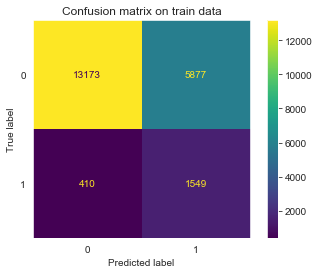

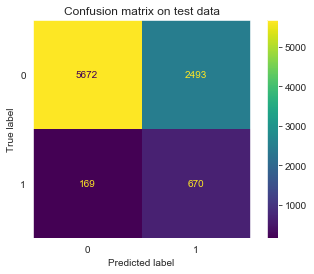

In [301]:
plot_confusion_matrix(grid_rf_model_pca, X_train_pca, y_train);
plt.title('Confusion matrix on train data', size=12);

plot_confusion_matrix(grid_rf_model_pca, X_test_pca, y_test);
plt.title('Confusion matrix on test data', size=12);

#### Evaluating Model with metrics and classification reports

In [303]:
model_result_report(train_result_df_rf,test_result_df_rf)

Training Accuracy score: 0.70
Training Recall/Sensitivity score: 0.79
Training Precision score: 0.21
Training AUC score: 0.74
Training F1 score: 0.33

*****************************************************
Test Accuracy score: 0.70
Test Recall/Sensitivity score: 0.80
Test Precision score: 0.21
Test AUC score: 0.75
Test F1 score: 0.33

*****************************************************


<span style='color:None'>**Training classification report:**</span>

              precision    recall  f1-score   support

           0       0.97      0.69      0.81     19050
           1       0.21      0.79      0.33      1959

    accuracy                           0.70     21009
   macro avg       0.59      0.74      0.57     21009
weighted avg       0.90      0.70      0.76     21009


*****************************************************


<span style='color:None'>**Test classification report:**</span>

              precision    recall  f1-score   support

           0       0.97      0.69      0.81      8165
           1       0.21      0.80      0.33       839

    accuracy                           0.70      9004
   macro avg       0.59      0.75      0.57      9004
weighted avg       0.90      0.70      0.77      9004



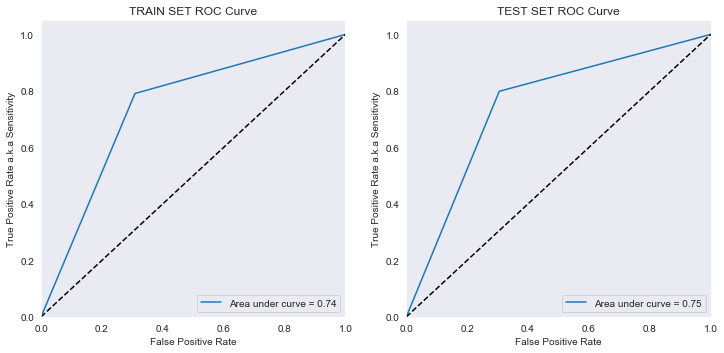

In [304]:
plot_roc(train_result_df_rf,test_result_df_rf)

**`Applying KFold cross validation to check model performance`**

In [ ]:
scores_rf_pca = cross_val_score(grid_rf_model_pca, X_train_pca,y_train,scoring='recall',cv=cv,n_jobs=-1,error_score='raise')

scores_rf_pca

In [ ]:
scores_rf_pca.mean(), scores_rf_pca.std()

**`Model with AdaBoostClassifier`**

**`Since there is no method to handle imbalance inside the boosting algorithms, Trying 'SMOTE' from imblearn library to oversample the minority samples i.e., churn case samples.`**

In [ ]:
print("Churn rate in Total customers data  {} %".format(round(y_train.value_counts()[1]/len(y_train)*100,2)))

In [ ]:
oversample = SMOTE()
X_train_pca, y_train = oversample.fit_resample(X_train_pca, y_train)

In [ ]:
print("Churn rate in Total customers data  {} %".format(round(y_train.value_counts()[1]/len(y_train)*100,2)))

In [ ]:
base_dtree = DecisionTreeClassifier()

In [ ]:
adboost_model=AdaBoostClassifier(random_state=20)

**`Building model along with applying Hyperparameter tuning and cross validation`**

In [ ]:
params_adabst = {'n_estimators':[50,100,150],'learning_rate':[0.001,0.1,0.50,1.0]}

In [ ]:
#cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=20)
cv = KFold(n_splits=10,random_state=20)

In [ ]:
grid_adboost_model = GridSearchCV(adboost_model, 
                               cv = cv,
                               param_grid=params_adabst, 
                               scoring = 'recall', 
                               return_train_score=True,
                              n_jobs=-1,verbose = 1)

In [ ]:
grid_adboost_model.fit(X_train_pca,y_train)

In [ ]:
grid_adboost_model.best_estimator_

#### `Making predictions on train and test sets`

In [ ]:
train_result_df_adbst, test_result_df_adbst = model_predictions_df(grid_adboost_model,X_train_pca,y_train,X_test_pca,y_test)

#### Model Evaluation

In [ ]:
confusion_mat(train_result_df_adbst,test_result_df_adbst)

In [ ]:
plot_confusion_matrix(grid_adboost_model, X_train_pca, y_train);
plt.title('Confusion matrix on train data', size=12);

plot_confusion_matrix(grid_adboost_model, X_test_pca, y_test);
plt.title('Confusion matrix on test data', size=12);

In [ ]:
model_result_report(train_result_df_adbst,test_result_df_adbst)

In [ ]:
plot_roc(train_result_df_adbst,test_result_df_adbst)

**`Applying KFold cross validation to check model performance`**

In [ ]:
scores_adbst = cross_val_score(grid_adboost_model, X_train_pca,y_train,scoring='recall',cv=cv,n_jobs=-1,error_score='raise')

scores_adbst

In [ ]:
scores_adbst.mean(), scores_adbst.std()

**`Among the 3 models Logistic regression, Random forest, and Adaboostclassifier tried with PCA, Chosen the Logistic regression model as the best one.
"""grid_logreg_model.best_estimator_""".`**

**`Achieved best results i.e., Recall a.k.a Sensitivity of 0.82 on train set and 0.84 on test data. And also achieved an AUC score of 0.82 on train set and 0.83 on test set.The model looks decent and simple, not leading to overfitting or underfitting when evaluated with Kfold cross validation.`**

**Best metric for this business problem is "Sensitivity/Recall" as it is churning problem and "False Neagtives i.e. Type 2 errors" leads to loss of valuable customers for the company, hence we need to reduce False negatives to predict the customers correctly who are more likely to churn.**

**Note: Here False positives may not be a problem, hence we didn't tried to optimize it, but if the company concerned about these as well, then we need to achieve balance between recall and precision.**

### Building Interpretable Model

In [270]:
X_train_lg,y_train_lg,X_test_lg,y_test_lg = standard_scaling(telecom_train,telecom_test)

**`Running RFE with the output number of the variable equal to 25`**

In [271]:
logm = LogisticRegression(n_jobs=-1)
logm.fit(X_train_lg, y_train_lg)

rfe = RFE(logm, 25)             
rfe = rfe.fit(X_train_lg, y_train_lg)

LogisticRegression(n_jobs=-1)

In [272]:
X_train_lg.columns[~rfe.support_]

Index(['arpu_6', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6',
       'roam_ic_mou_7',
       ...
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'total_rech_data_6',
       'total_rech_data_7', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'total_amnt_data_7', 'total_recharge_amount_7', 'avg_amnt_6_7'],
      dtype='object', length=109)

In [273]:
rfe_cols = X_train_lg.columns[rfe.support_]
rfe_cols

Index(['arpu_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_7',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2m_mou_8', 'std_ic_mou_8',
       'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'sep_vbc_3g',
       'total_amnt_data_6', 'total_recharge_amount_6'],
      dtype='object')

**`Plotting heatmap to observe the correlations among rfe columns and along with churn columns`**

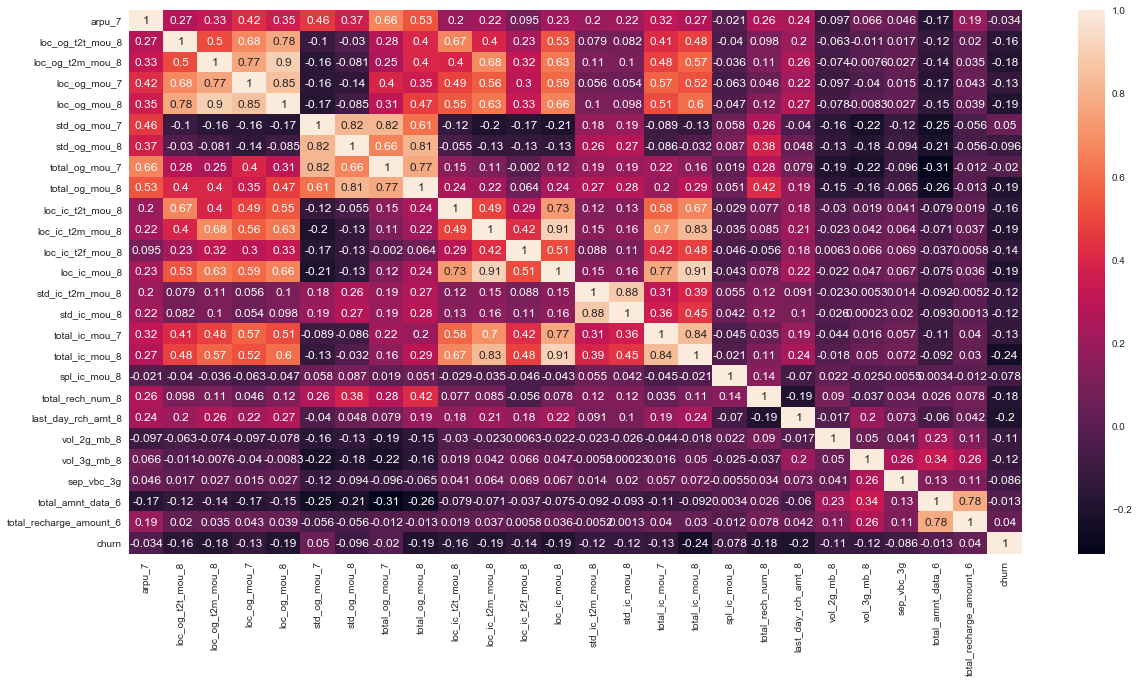

In [274]:
rfe_cols_corr = list(rfe_cols).copy()
rfe_cols_corr.append('churn')
plt.figure(figsize = (20,10))
sns.heatmap(high_value[rfe_cols_corr].corr(),annot = True);

In [275]:
X_train_rfe = X_train_lg[rfe_cols]

In [276]:
X_test_rfe = X_test_lg[rfe_cols]

In [277]:
X_train_rfe.head()

arpu_7  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_mou_7  loc_og_mou_8  \
0   -0.25             -0.50             -0.74         -0.25         -0.73   
1   -0.74             -0.72             -0.86         -0.16         -0.88   
2   -0.12              1.17              0.49          0.86          0.68   
3   -0.13             -0.41             -0.21          0.21         -0.31   
4   -0.27             -0.72             -0.51         -0.79         -0.66   

   std_og_mou_7  std_og_mou_8  total_og_mou_7  total_og_mou_8  \
0         -0.70         -0.65           -0.79           -0.93   
1         -0.41         -0.57           -0.49           -0.93   
2         -0.68         -0.60           -0.23           -0.24   
3         -0.70         -0.62           -0.58           -0.70   
4         -0.70         -0.61           -1.04           -0.86   

   loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
0             -0.67             -0.80             -0.58         -0.84   
1             -0.80             -0.84              3.14         -0.60   
2              2.36              1.78              0.14          1.84   
3             -0.28             -0.29             -0.23         -0.36   
4             -0.80             -0.63             -0.58         -0.77   

   std_ic_t2m_mou_8  std_ic_mou_8  total_ic_mou_7  total_ic_mou_8  \
0             -0.52         -0.60           -0.38           -0.89   
1             -0.23         -0.42            0.39           -0.64   
2             -0.49         -0.56            1.44            1.39   
3             -0.62         -0.66           -0.20           -0.47   
4              0.39         -0.02           -0.76           -0.59   

   spl_ic_mou_8  total_rech_num_8  last_day_rch_amt_8  vol_2g_mb_8  \
0         -0.29             -1.05                0.62         1.14   
1         -0.29             -0.91               -0.37        -0.45   
2         -0.29              0.06                0.86        -0.45   
3         -0.29             -1.19                2.11        -0.45   
4         -0.29             -1.05                2.13         1.04   

   vol_3g_mb_8  sep_vbc_3g  total_amnt_data_6  total_recharge_amount_6  
0         0.87       -0.29              -0.59                    -1.03  
1        -0.52       -0.29              -0.49                    -0.61  
2        -0.52       -0.29              -0.59                    -1.08  
3        -0.52       -0.29              -0.49                    -0.72  
4         0.35       -0.29              -0.59                    -1.14

`Taking copy X,y data for model with Logistic regression`

In [278]:
X_train_rfe_lg = X_train_lg[rfe_cols]
X_test_rfe_lg = X_test_lg[rfe_cols]
y_train_lg = y_train_lg.copy()
y_test_lg = y_test_lg.copy()

In [279]:
def model_glm(y,X):
    
    """This function takes X,y data as input and builds the model and print the summary of the model."""

    model = sm.GLM(list(y),(sm.add_constant(X)),family=sm.families.Binomial())
    print(model.fit().summary())    

In [280]:
model_glm(y_train_lg,X_train_rfe_lg)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                21035
Model:                            GLM   Df Residuals:                    21009
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3836.9
Date:                Mon, 31 Aug 2020   Deviance:                       7673.7
Time:                        10:40:28   Pearson chi2:                 3.89e+06
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [281]:
def vif_observe(X):
    
    """This function takes X data as input and print the VIF dataframe for the X data given to the model"""

    vif_rfe = pd.DataFrame()

    vif_rfe['features'] = X.columns
    vif_rfe['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_rfe['VIF'] = round(vif_rfe['VIF'], 2)
    vif_rfe = vif_rfe.sort_values(by = "VIF", ascending = False)
    
    return vif_rfe.T


In [282]:
vif_observe(X_train_rfe_lg)

7             4               8             5   \
features  total_og_mou_7  loc_og_mou_8  total_og_mou_8  std_og_mou_7   
VIF                38.90         38.33           37.05         34.45   

                    12            6               16            3   \
features  loc_ic_mou_8  std_og_mou_8  total_ic_mou_8  loc_og_mou_7   
VIF              33.39         30.60           15.09         14.47   

                        2                 10                1             14  \
features  loc_og_t2m_mou_8  loc_ic_t2m_mou_8  loc_og_t2t_mou_8  std_ic_mou_8   
VIF                  14.13             13.63              6.56          5.72   

                        9               15                13  \
features  loc_ic_t2t_mou_8  total_ic_mou_7  std_ic_t2m_mou_8   
VIF                   5.18            4.33              4.29   

                         23                       24      0   \
features  total_amnt_data_6  total_recharge_amount_6  arpu_7   
VIF                    4.15                     3.69    2.56   

                        11                18           21                  19  \
features  loc_ic_t2f_mou_8  total_rech_num_8  vol_3g_mb_8  last_day_rch_amt_8   
VIF                   1.55              1.51         1.37                1.36   

                   20          22            17  
features  vol_2g_mb_8  sep_vbc_3g  spl_ic_mou_8  
VIF              1.11        1.10          1.03

`Dropping total_og_mou_7 columns as it has high VIF`

In [283]:
X_train_rfe_lg = X_train_lg[rfe_cols]

X_train_rfe_lg = X_train_rfe_lg.drop(['total_og_mou_7'],axis=1)

In [284]:
model_glm(y_train_lg,X_train_rfe_lg)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                21035
Model:                            GLM   Df Residuals:                    21010
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3841.2
Date:                Mon, 31 Aug 2020   Deviance:                       7682.5
Time:                        11:01:35   Pearson chi2:                 4.76e+06
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [285]:
vif_observe(X_train_rfe_lg)

4             11              7             6   \
features  loc_og_mou_8  loc_ic_mou_8  total_og_mou_8  std_og_mou_8   
VIF              37.05         33.38           23.04         20.25   

                      15                2                 9   \
features  total_ic_mou_8  loc_og_t2m_mou_8  loc_ic_t2m_mou_8   
VIF                15.08             13.82             13.62   

                        1             13                8             3   \
features  loc_og_t2t_mou_8  std_ic_mou_8  loc_ic_t2t_mou_8  loc_og_mou_7   
VIF                   6.52          5.72              5.18          5.16   

                      14                12            5                  22  \
features  total_ic_mou_7  std_ic_t2m_mou_8  std_og_mou_7  total_amnt_data_6   
VIF                 4.33              4.29          4.20               4.15   

                               23      0                 10                17  \
features  total_recharge_amount_6  arpu_7  loc_ic_t2f_mou_8  total_rech_num_8   
VIF                          3.69    2.50              1.55              1.51   

                   20                  18           19          21  \
features  vol_3g_mb_8  last_day_rch_amt_8  vol_2g_mb_8  sep_vbc_3g   
VIF              1.37                1.35         1.11        1.10   

                    16  
features  spl_ic_mou_8  
VIF               1.03

`Dropping loc_og_mou_8 columns as it has high VIF, and std_og_mou_7 as it has high p-value`

In [286]:
X_train_rfe_lg = X_train_lg[rfe_cols]

X_train_rfe_lg = X_train_rfe_lg.drop(['total_og_mou_7','loc_og_mou_8','std_og_mou_7'],axis=1)

In [287]:
model_glm(y_train_lg,X_train_rfe_lg)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                21035
Model:                            GLM   Df Residuals:                    21012
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3858.4
Date:                Mon, 31 Aug 2020   Deviance:                       7716.7
Time:                        11:15:39   Pearson chi2:                 1.66e+07
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [288]:
vif_observe(X_train_rfe_lg)

9               5               13                7   \
features  loc_ic_mou_8  total_og_mou_8  total_ic_mou_8  loc_ic_t2m_mou_8   
VIF              32.63           15.65           15.01             13.26   

                    4             11                6             3   \
features  std_og_mou_8  std_ic_mou_8  loc_ic_t2t_mou_8  loc_og_mou_7   
VIF              12.58          5.71              5.07          4.80   

                        2                 10              12  \
features  loc_og_t2m_mou_8  std_ic_t2m_mou_8  total_ic_mou_7   
VIF                   4.68              4.29            4.23   

                         20                       21                1   \
features  total_amnt_data_6  total_recharge_amount_6  loc_og_t2t_mou_8   
VIF                    4.13                     3.69              3.43   

              0                 8                 15           18  \
features  arpu_7  loc_ic_t2f_mou_8  total_rech_num_8  vol_3g_mb_8   
VIF         2.09              1.54              1.49         1.34   

                          16           17          19            14  
features  last_day_rch_amt_8  vol_2g_mb_8  sep_vbc_3g  spl_ic_mou_8  
VIF                     1.32         1.11        1.10          1.03

`Dropping loc_og_t2m_mou_8 as it has high p-value`

In [289]:
X_train_rfe_lg = X_train_lg[rfe_cols]

X_train_rfe_lg = X_train_rfe_lg.drop(['total_og_mou_7','loc_og_mou_8','std_og_mou_7','loc_og_t2m_mou_8'],axis=1)

In [290]:
model_glm(y_train_lg,X_train_rfe_lg)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                21035
Model:                            GLM   Df Residuals:                    21013
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3858.5
Date:                Mon, 31 Aug 2020   Deviance:                       7716.9
Time:                        11:29:03   Pearson chi2:                 1.51e+07
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [291]:
vif_observe(X_train_rfe_lg)

8               12                6               4   \
features  loc_ic_mou_8  total_ic_mou_8  loc_ic_t2m_mou_8  total_og_mou_8   
VIF              32.36           15.00             12.14           11.98   

                    3             10                5                 9   \
features  std_og_mou_8  std_ic_mou_8  loc_ic_t2t_mou_8  std_ic_t2m_mou_8   
VIF              10.03          5.71              5.05              4.29   

                         19              11            2   \
features  total_amnt_data_6  total_ic_mou_7  loc_og_mou_7   
VIF                    4.13            4.11          4.11   

                               20                1       0                 7   \
features  total_recharge_amount_6  loc_og_t2t_mou_8  arpu_7  loc_ic_t2f_mou_8   
VIF                          3.68              3.21    2.09              1.54   

                        14           17                  15           16  \
features  total_rech_num_8  vol_3g_mb_8  last_day_rch_amt_8  vol_2g_mb_8   
VIF                   1.49         1.34                1.31         1.11   

                  18            13  
features  sep_vbc_3g  spl_ic_mou_8  
VIF             1.10          1.03

`Dropping loc_ic_mou_8 as it has high VIF`

In [292]:
X_train_rfe_lg = X_train_lg[rfe_cols]

X_train_rfe_lg = X_train_rfe_lg.drop(['total_og_mou_7','loc_og_mou_8','std_og_mou_7','loc_og_t2m_mou_8','loc_ic_mou_8'],axis=1)

In [293]:
model_glm(y_train_lg,X_train_rfe_lg)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                21035
Model:                            GLM   Df Residuals:                    21014
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3932.1
Date:                Mon, 31 Aug 2020   Deviance:                       7864.2
Time:                        11:42:28   Pearson chi2:                 3.04e+06
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [294]:
vif_observe(X_train_rfe_lg)

4               11            3             9   \
features  total_og_mou_8  total_ic_mou_8  std_og_mou_8  std_ic_mou_8   
VIF                11.98           10.82         10.03          5.27   

                        6                 8                  18  \
features  loc_ic_t2m_mou_8  std_ic_t2m_mou_8  total_amnt_data_6   
VIF                   4.68              4.29               4.13   

                      10            2                        19  \
features  total_ic_mou_7  loc_og_mou_7  total_recharge_amount_6   
VIF                 4.11          4.11                     3.68   

                        1                 5       0                 13  \
features  loc_og_t2t_mou_8  loc_ic_t2t_mou_8  arpu_7  total_rech_num_8   
VIF                   3.21              3.00    2.09              1.49   

                        7            16                  14           15  \
features  loc_ic_t2f_mou_8  vol_3g_mb_8  last_day_rch_amt_8  vol_2g_mb_8   
VIF                   1.35         1.34                1.31         1.11   

                  17            12  
features  sep_vbc_3g  spl_ic_mou_8  
VIF             1.10          1.03

`Dropping total_og_mou_8 as it has high VIF`

In [295]:
X_train_rfe_lg = X_train_lg[rfe_cols]

X_train_rfe_lg = X_train_rfe_lg.drop(['total_og_mou_7','loc_og_mou_8','std_og_mou_7','loc_og_t2m_mou_8',
                                      'loc_ic_mou_8','total_og_mou_8'],axis=1)

In [296]:
model_glm(y_train_lg,X_train_rfe_lg)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                21035
Model:                            GLM   Df Residuals:                    21015
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3957.3
Date:                Mon, 31 Aug 2020   Deviance:                       7914.7
Time:                        11:54:09   Pearson chi2:                 6.19e+06
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [297]:
vif_observe(X_train_rfe_lg)

10            8                 5                 7   \
features  total_ic_mou_8  std_ic_mou_8  loc_ic_t2m_mou_8  std_ic_t2m_mou_8   
VIF                10.55          5.26              4.63              4.29   

                         17              9                        18  \
features  total_amnt_data_6  total_ic_mou_7  total_recharge_amount_6   
VIF                    4.12            3.92                     3.67   

                    2                 4                 1       0   \
features  loc_og_mou_7  loc_ic_t2t_mou_8  loc_og_t2t_mou_8  arpu_7   
VIF               3.07              2.95              2.74    2.08   

                    3                 12                6            15  \
features  std_og_mou_8  total_rech_num_8  loc_ic_t2f_mou_8  vol_3g_mb_8   
VIF               1.82              1.44              1.35         1.34   

                          13           14          16            11  
features  last_day_rch_amt_8  vol_2g_mb_8  sep_vbc_3g  spl_ic_mou_8  
VIF                     1.29         1.11        1.10          1.03

`Dropping total_ic_mou_8 as it has high VIF`

In [298]:
X_train_rfe_lg = X_train_lg[rfe_cols]

X_train_rfe_lg = X_train_rfe_lg.drop(['total_og_mou_7','loc_og_mou_8','std_og_mou_7','loc_og_t2m_mou_8',
                                      'loc_ic_mou_8','total_og_mou_8','total_ic_mou_8'],axis=1)

In [299]:
model_glm(y_train_lg,X_train_rfe_lg)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                21035
Model:                            GLM   Df Residuals:                    21016
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4064.9
Date:                Mon, 31 Aug 2020   Deviance:                       8129.7
Time:                        12:05:42   Pearson chi2:                 9.69e+04
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [300]:
vif_observe(X_train_rfe_lg)

8                 7                  16  \
features  std_ic_mou_8  std_ic_t2m_mou_8  total_amnt_data_6   
VIF               4.60              4.28               4.12   

                               17              9             2   \
features  total_recharge_amount_6  total_ic_mou_7  loc_og_mou_7   
VIF                          3.67            3.05          3.02   

                        1                 4                 5       0   \
features  loc_og_t2t_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  arpu_7   
VIF                   2.73              2.37              2.34    2.08   

                    3                 11           14                6   \
features  std_og_mou_8  total_rech_num_8  vol_3g_mb_8  loc_ic_t2f_mou_8   
VIF               1.82              1.44         1.34              1.29   

                          12           13          15            10  
features  last_day_rch_amt_8  vol_2g_mb_8  sep_vbc_3g  spl_ic_mou_8  
VIF                     1.28         1.11        1.10          1.03

In [301]:
X_test_rfe_lg = X_test_rfe_lg.drop(['total_og_mou_7','loc_og_mou_8','std_og_mou_7','loc_og_t2m_mou_8',
                                      'loc_ic_mou_8','total_og_mou_8','total_ic_mou_8'],axis=1)

**`Building final model with Logistic Regression`**

In [302]:
final_model_log = LogisticRegression(class_weight='balanced',random_state=20)

In [303]:
final_model_log = final_model_log.fit(X_train_rfe_lg, y_train_lg)

**`Making predictions`**

In [345]:
train_result_df_final, test_result_df_final = model_predictions_df(final_model_log,X_train_rfe_lg,y_train_lg,X_test_rfe_lg,y_test_lg)

In [346]:
train_result_df_final.head(2)
test_result_df_final.head(2)

churn  predicted  pred_probability
0      0          0              0.28
1      0          0              0.44

churn  predicted  pred_probability
0      0          0              0.02
1      1          0              0.37

#### Threshold adjusting

` Creating new column 'predicted_new' with 1 if Churn_Prob>0.4 else 0`

In [347]:
test_result_df_final['predicted_new'] = test_result_df_final.pred_probability.map(lambda x: 1 if x > 0.40 else 0)
test_result_df_final.head()

churn  predicted  pred_probability  predicted_new
0      0          0              0.02              0
1      1          0              0.37              0
2      1          1              0.92              1
3      0          0              0.12              0
4      0          1              0.83              1

test_result_df_final['predicted'] = test_result_df_final.pred_probability.map(lambda x: 1 if x > 0.40 else 0)
test_result_df_final.head()

### Model Evaluation

In [349]:
confusion_mat(train_result_df_final,test_result_df_final)

Training set confusion matrix:
 [[15585  3625]
 [  300  1525]]


Test set confusion matrix:
 [[6748 1485]
 [ 146  636]]


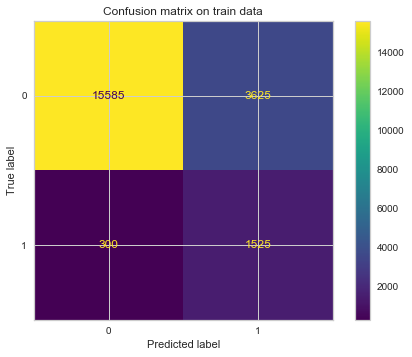

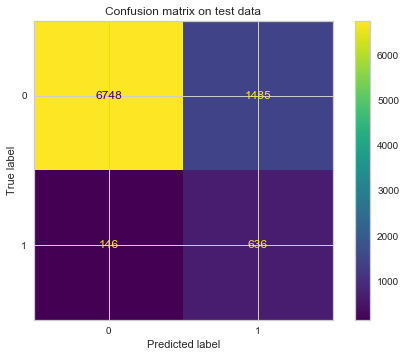

In [350]:
plot_confusion_matrix(final_model_log, X_train_rfe_lg, y_train_lg);
plt.title('Confusion matrix on train data', size=12);

plot_confusion_matrix(final_model_log, X_test_rfe_lg, y_test_lg);
plt.title('Confusion matrix on test data', size=12);

### `Evaluating Model with metrics and classification reports` 

In [352]:
model_result_report(train_result_df_final,test_result_df_final)

Training Accuracy score: 0.81
Training Recall/Sensitivity score: 0.84
Training Precision score: 0.30
Training AUC score: 0.82
Training F1 score: 0.44

*****************************************************
Test Accuracy score: 0.82
Test Recall/Sensitivity score: 0.81
Test Precision score: 0.30
Test AUC score: 0.82
Test F1 score: 0.44

*****************************************************


<span style='color:None'>**Training classification report:**</span>

              precision    recall  f1-score   support

           0       0.98      0.81      0.89     19210
           1       0.30      0.84      0.44      1825

    accuracy                           0.81     21035
   macro avg       0.64      0.82      0.66     21035
weighted avg       0.92      0.81      0.85     21035


*****************************************************


<span style='color:None'>**Test classification report:**</span>

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8233
           1       0.30      0.81      0.44       782

    accuracy                           0.82      9015
   macro avg       0.64      0.82      0.67      9015
weighted avg       0.92      0.82      0.85      9015



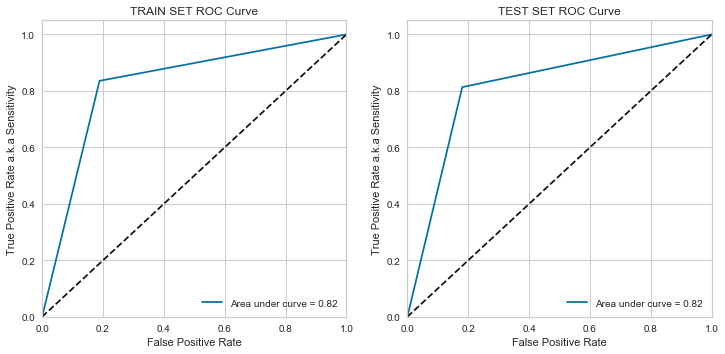

In [354]:
plot_roc(train_result_df_final,test_result_df_final)

**`Applying KFold cross validation to check model performance`**

In [355]:
cv = KFold(n_splits=10,random_state=20)

In [356]:
scores_final = cross_val_score(final_model_log, X_train_rfe_lg,y_train_lg,scoring='recall',cv=cv,n_jobs=-1,error_score='raise')

scores_final

array([0.84946237, 0.81547619, 0.84042553, 0.81521739, 0.8373494 ,
       0.79787234, 0.83928571, 0.85635359, 0.84482759, 0.84939759])

In [357]:
scores_final.mean(), scores_final.std()

(0.8345667699317001, 0.017808560618497758)

**`Tried building models with Logistic regression and Random forest by playing with top 25 variables given by RFE. 
Chosen the model with Logistic regression as the best model since got the best result with iti.e., Sensitivity a.k.a Recall of 0.84 on train set and 0.81 on test set. And also AUC score of 0.82 on both train and test sets.`**

**`And also observed that the model is neither underfitting nor overfitting, giving a decent results on both sets and shown same performance with Kfold cross validation.`**

### Model Interpretation

**`Rankings of final features`**

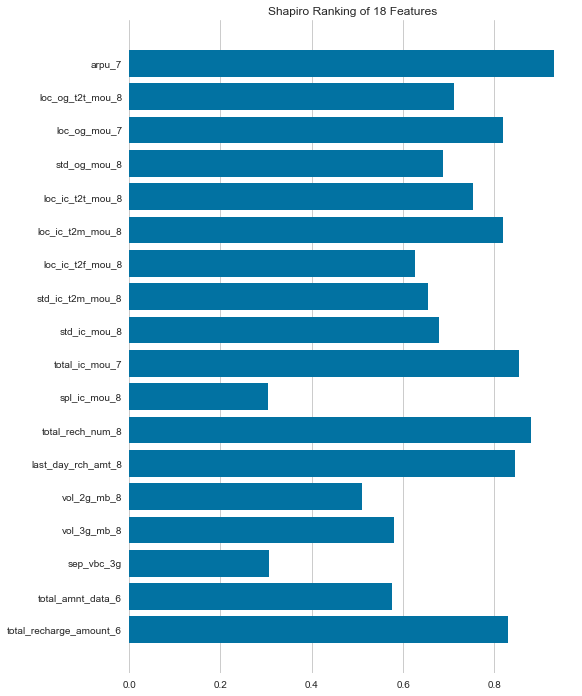

In [358]:
fig, ax = plt.subplots(1, figsize=(8, 12))
vzr = Rank1D(ax=ax)
vzr.fit(X_train_rfe_lg, y_train_lg)
vzr.transform(X_train_rfe_lg)
sns.despine(left=True, bottom=True)
vzr.poof();

**`Pearson correlation ranking of final features`**

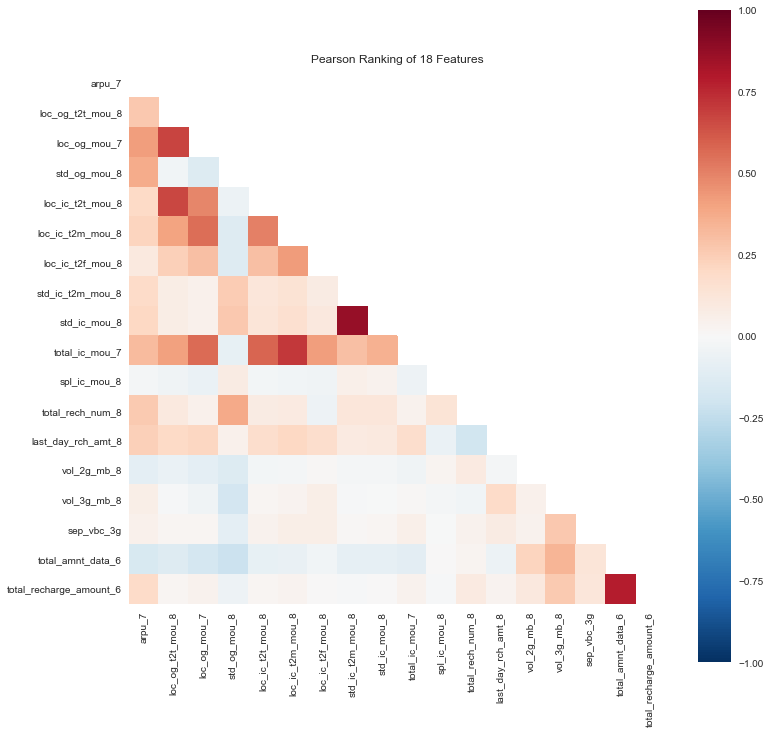

In [359]:
fig, ax = plt.subplots(1, figsize=(12, 12))
vzr = Rank2D(ax=ax)
vzr.fit(X_train_rfe_lg, y_train_lg)
vzr.transform(X_train_rfe_lg)
sns.despine(left=True, bottom=True)
vzr.poof();

**`Feature importances of the final features`**

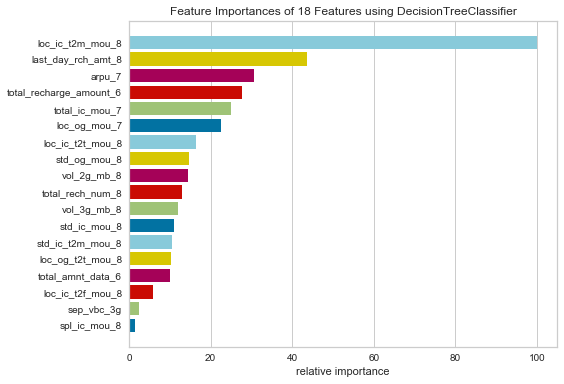

In [360]:
clf = DecisionTreeClassifier()
viz = FeatureImportances(clf)
viz.fit(X_train_rfe_lg, y_train_lg)
viz.poof();

#### Summary stats of final top features with churn

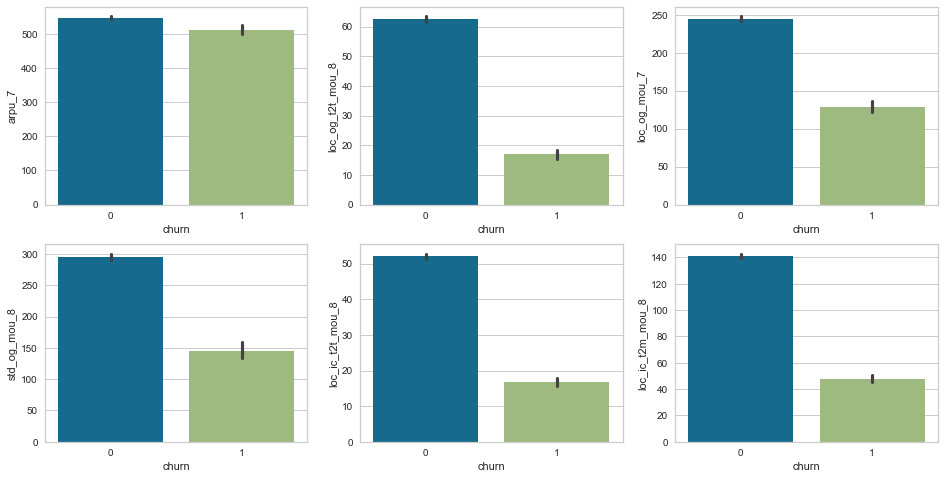

In [361]:
plt.figure(figsize=(16, 8))
plt.subplot(2,3,1)
sns.barplot(x = 'churn', y = 'arpu_7', data = high_value)
plt.subplot(2,3,2)
sns.barplot(x = 'churn', y = 'loc_og_t2t_mou_8', data = high_value)
plt.subplot(2,3,3)
sns.barplot(x = 'churn', y = 'loc_og_mou_7', data = high_value)
plt.subplot(2,3,4)
sns.barplot(x = 'churn', y = 'std_og_mou_8', data = high_value)
plt.subplot(2,3,5)
sns.barplot(x = 'churn', y = 'loc_ic_t2t_mou_8', data = high_value)
plt.subplot(2,3,6)
sns.barplot(x = 'churn', y = 'loc_ic_t2m_mou_8', data = high_value)
plt.show();

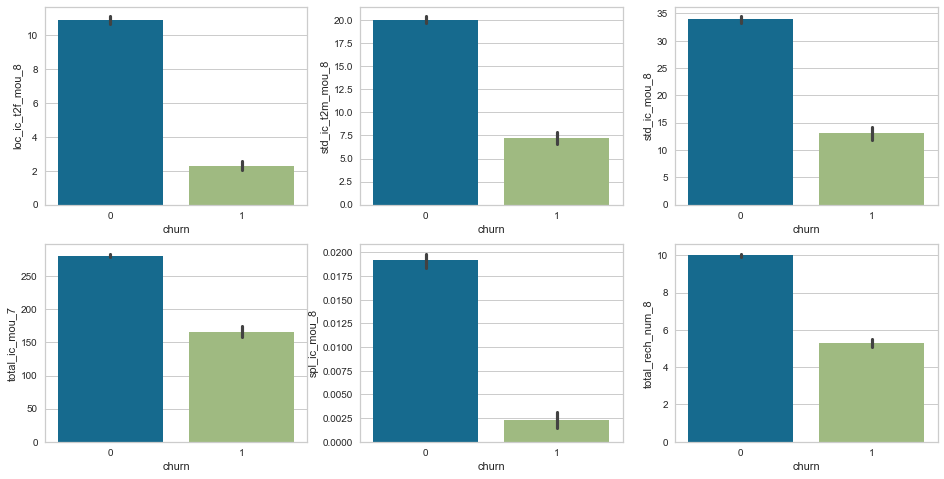

In [362]:
plt.figure(figsize=(16, 8))
plt.subplot(2,3,1)
sns.barplot(x = 'churn', y = 'loc_ic_t2f_mou_8', data = high_value)
plt.subplot(2,3,2)
sns.barplot(x = 'churn', y = 'std_ic_t2m_mou_8', data = high_value)
plt.subplot(2,3,3)
sns.barplot(x = 'churn', y = 'std_ic_mou_8', data = high_value)
plt.subplot(2,3,4)
sns.barplot(x = 'churn', y = 'total_ic_mou_7', data = high_value)
plt.subplot(2,3,5)
sns.barplot(x = 'churn', y = 'spl_ic_mou_8', data = high_value)
plt.subplot(2,3,6)
sns.barplot(x = 'churn', y = 'total_rech_num_8', data = high_value)
plt.show();

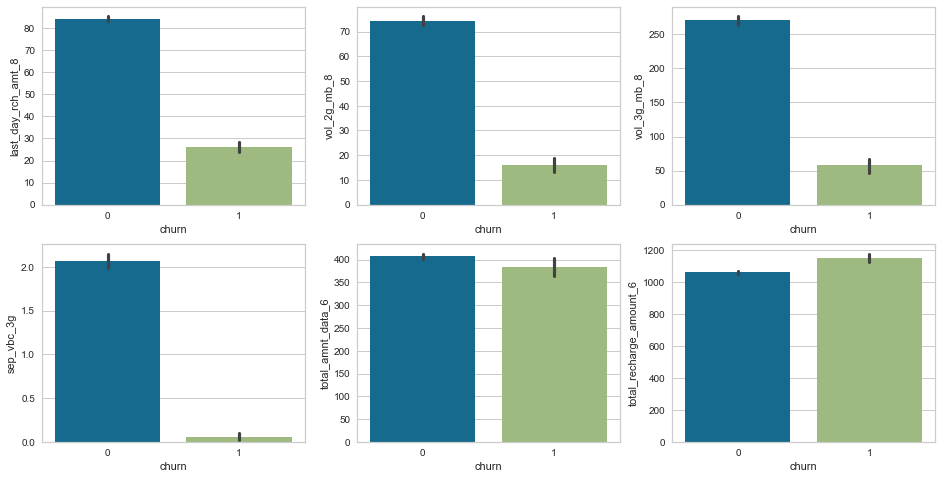

In [363]:
plt.figure(figsize=(16, 8))
plt.subplot(2,3,1)
sns.barplot(x = 'churn', y = 'last_day_rch_amt_8', data = high_value)
plt.subplot(2,3,2)
sns.barplot(x = 'churn', y = 'vol_2g_mb_8', data = high_value)
plt.subplot(2,3,3)
sns.barplot(x = 'churn', y = 'vol_3g_mb_8', data = high_value)
plt.subplot(2,3,4)
sns.barplot(x = 'churn', y = 'sep_vbc_3g', data = high_value)
plt.subplot(2,3,5)
sns.barplot(x = 'churn', y = 'total_amnt_data_6', data = high_value)
plt.subplot(2,3,6)
sns.barplot(x = 'churn', y = 'total_recharge_amount_6', data = high_value)
plt.show();

### Suggestions to the Business

In [364]:
print("The KPIs or variables impacting the churn rate are: \n\n", X_train_rfe_lg.columns)

The KPIs or variables impacting the churn rate are: 

 Index(['arpu_7', 'loc_og_t2t_mou_8', 'loc_og_mou_7', 'std_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_mou_8', 'total_ic_mou_7', 'spl_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'sep_vbc_3g', 'total_amnt_data_6', 'total_recharge_amount_6'],
      dtype='object')


In [365]:
print("Coefficients of the final model:: \n", final_model_log.coef_)

Coefficients of the final model:: 
 [[ 0.5099497  -0.17423419 -0.38158594 -0.39927427 -0.31434316 -0.63694024
  -0.4394682  -0.19498433 -0.18662628  0.32538765 -0.412916   -0.57748204
  -0.67982749 -0.48573774 -0.60833193 -1.23073587 -0.32108084  0.53076624]]


We can observe that from the coefficients of variables,  

1) Variables 'arpu_7', 'total_ic_mou_7', and 'total_recharge_amount_6' having positive correlation (positive coefficients) with churn and means that even though people who are spending money on recharges are churning. The re can be many reasons for this.

2) Variables 'loc_og_t2t_mou_8', 'loc_og_mou_7', 'std_og_mou_8','loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
    'std_ic_t2m_mou_8', 'std_ic_mou_8', 'total_ic_mou_7', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 
    'vol_2g_mb_8', 'vol_3g_mb_8','sep_vbc_3g', 'total_amnt_data_6' are having negative correlations (negative coefficients) with churn, and these all are usage variables.
    
Means that as the usage reducing the churn rate in creasing.

1) We can observe that users who are spending more also more likely to churn, The main reason for this could be the poor network and internet connectivity.

2) The users who are making outgoing calls from local and minutes of usage is less than 20 are likely to churn.
       We have multiple reasons for this, the customer may not really interested in making frequent calls or may be because of  tariff rates.So company can offer some free outgoing calls or discounted calls to motivate the user to make user a frequent caller.

3) We can observe that users made good amount of outgoing calls in month 7 but not in month 8 are more likely to churn.

   We can observe that users who spend and increase the revenue are not utilising the services frequently, reason can be poor network in their locality or tariff can also be a reason. So the company can focus on improving the network and resolve if there are any complaints from the users.
    

4) Users who are spending more but whose usage is very less are more likely to churn. Users whose usage is more for month 7 and less for month are more likely to churn.


5) We can observe that the users the users who churned, the mean total recharge amount is reduced to half of non churned users.     

6) We can observe that people who churned are not frequent users of internet data, but they have recharged for data packs of 2g nd 3g.
   May be they are just new to use internet facility or may belongs to middle age or old age who don't use internet as much as young and teenagers.
    
7) We can observe that users who churned were opted for internet and recharged for data packs for months 6. So the reason for churning may be the poor internet connectivity.
   There is a high churn rate in people who recharged for data packs initially and churned later means they must be dissatisfied with the service or network.

###  Thank You..!!